<a href="https://colab.research.google.com/github/PineBiotech/omicslogic/blob/master/Seurat_Data_Analysis_and_Visualization_Single_Cell_RNA_Seq_NSCLC_(non_small_lung_cancer)_project_in_R_(exercise_for_OmicsLogic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          2.0                         
year           2022                        
month          04                          
day            22                          
svn rev        82229                       
language       R                           
version.string R version 4.2.0 (2022-04-22)
nickname       Vigorous Calisthenics       

In [2]:
devtools::install_github(repo = "satijalab/seurat", ref = "loom")

iterators    (NA    -> 1.0.14    ) [CRAN]
Rcpp         (NA    -> 1.0.8.3   ) [CRAN]
DEoptimR     (NA    -> 1.0-11    ) [CRAN]
robustbase   (NA    -> 0.95-0    ) [CRAN]
rlang        (1.0.2 -> 1.0.3     ) [CRAN]
zoo          (NA    -> 1.8-10    ) [CRAN]
sandwich     (NA    -> 3.0-2     ) [CRAN]
TH.data      (NA    -> 1.1-1     ) [CRAN]
multcomp     (NA    -> 1.4-19    ) [CRAN]
plotrix      (NA    -> 3.8-2     ) [CRAN]
mvtnorm      (NA    -> 1.1-3     ) [CRAN]
MatrixModels (NA    -> 0.5-0     ) [CRAN]
SparseM      (NA    -> 1.81      ) [CRAN]
quantreg     (NA    -> 5.93      ) [CRAN]
numDeriv     (NA    -> 2016.8-1.1) [CRAN]
mnormt       (NA    -> 2.1.0     ) [CRAN]
sn           (NA    -> 2.0.2     ) [CRAN]
rbibutils    (NA    -> 2.2.8     ) [CRAN]
gridExtra    (NA    -> 2.3       ) [CRAN]
htmlwidgets  (NA    -> 1.5.4     ) [CRAN]
checkmate    (NA    -> 2.1.0     ) [CRAN]
RcppEigen    (NA    -> 0.3.3.9.2 ) [CRAN]
deldir       (NA    -> 1.0-6     ) [CRAN]
interp       (NA    -> 1.1-2     )

Skipping 2 packages not available: multtest, SDMTools

Installing 110 packages: iterators, Rcpp, DEoptimR, robustbase, rlang, zoo, sandwich, TH.data, multcomp, multtest, plotrix, mvtnorm, MatrixModels, SparseM, quantreg, numDeriv, mnormt, sn, rbibutils, gridExtra, htmlwidgets, checkmate, RcppEigen, deldir, interp, jpeg, png, later, lazyeval, bitops, plyr, parallelly, listenv, globals, future, SQUAREM, progressr, future.apply, lava, prodlim, timeDate, ipred, hardhat, gower, proxy, mclust, modeltools, caTools, gtools, itertools, hdf5r, here, RcppTOML, snow, foreach, qqconf, mathjaxr, mutoss, TFisher, Rdpack, viridis, htmlTable, latticeExtra, Formula, igraph, scatterplot3d, promises, crosstalk, reshape2, recipes, pROC, ModelMetrics, e1071, kernlab, diptest, prabclus, flexmix, segmented, gplots, RcppProgress, loomR, reticulate, doSNOW, fitdistrplus, lmtest, metap, ggridges, Hmisc, diffusionMap, plotly, SDMTools, dtw, ranger, tclust, gdata, irlba, caret, RANN, FNN, pbapply, VGAM, ape, fpc, 

* checking for file ‘/tmp/RtmpiOYCdn/remotes3d1dde1958/satijalab-seurat-8192937/DESCRIPTION’ ... OK
* preparing ‘Seurat’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘Seurat_2.3.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpiOYCdn/file3d45578967/Seurat_2.3.1.tar.gz’ had non-zero exit status”


In [4]:
install.packages("Seurat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘sitmo’, ‘RcppArmadillo’, ‘sp’, ‘rgeos’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘spatstat.data’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘abind’, ‘tensor’, ‘goftest’, ‘polyclip’, ‘RSpectra’, ‘dqrng’, ‘ggrepel’, ‘leiden’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘RcppAnnoy’, ‘scattermore’, ‘sctransform’, ‘SeuratObject’, ‘shiny’, ‘spatstat.core’, ‘spatstat.geom’, ‘uwot’




In [5]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
library(Seurat)
library(ggplot2)

In [22]:
#function to set ggplot size in Jupyter notebooks
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

In [23]:
#load data
cluster_annotation <- readr::read_csv("https://www.dropbox.com/s/epqy81ozsi1aa5p/annotated_clusters.csv?dl=1")
seurat_object <- readr::read_rds("https://www.dropbox.com/s/wlozaiwvueo571d/seurat_object.rds?dl=1")
sample_name = "NSCLC - scRNA-seq (GSE148071)"

New names:
• `` -> `...1`
Rows: 16 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gene_id, Cell Type
dbl (5): ...1, p_val, avg_log2FC, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#run tSNE
seurat_object <- RunTSNE(seurat_object, reduction = "pca", dims = 1:20, perplexity=1000)

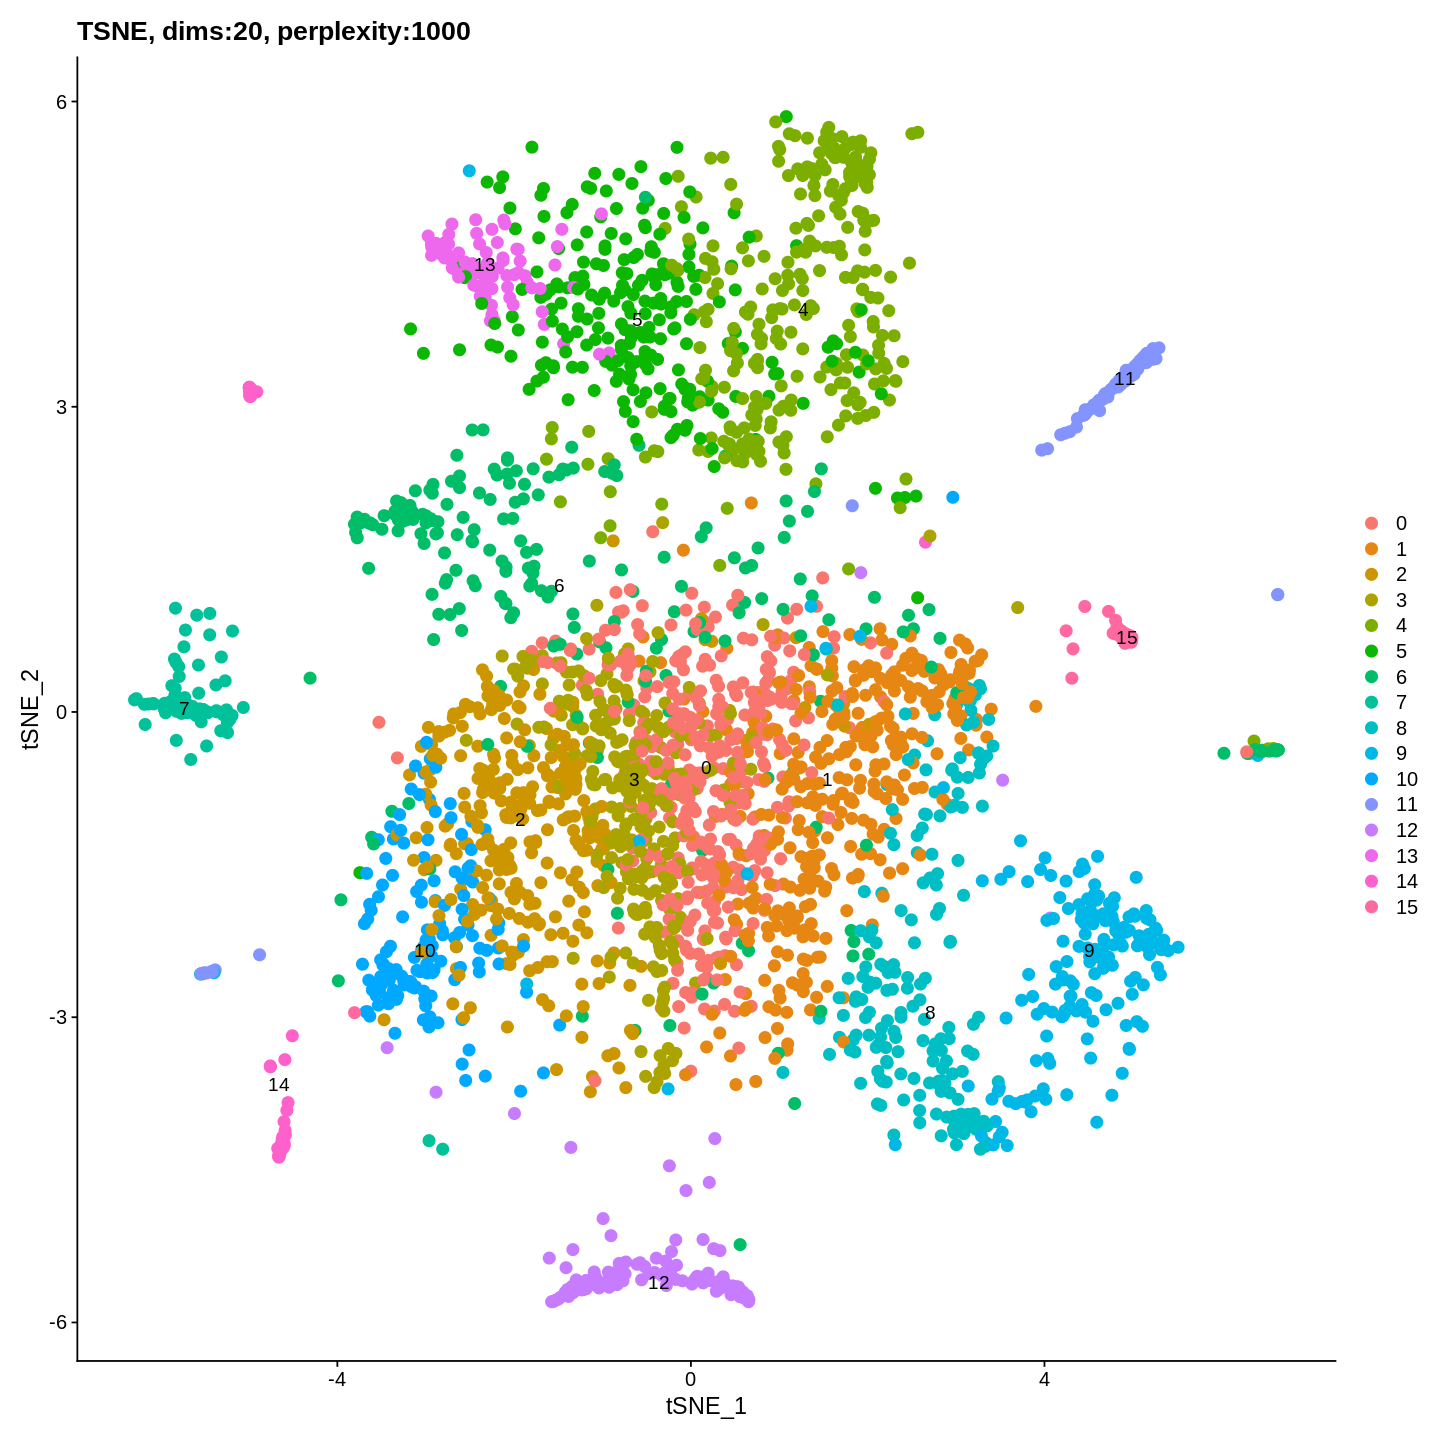

In [24]:
p <- DimPlot(seurat_object, reduction = "tsne", label = TRUE, pt.size = 3)
p + labs(title = "TSNE, dims:20, perplexity:1000", fig(12,12))

In [47]:
#run UMAP
seurat_object <- RunUMAP(seurat_object, reduction = "pca", dims = 1:20, n.components = 2, n.neighbors = 30,
                 n.epochs = 300, min.dist = 1, learning.rate = 5, spread = 2, verbose = FALSE)

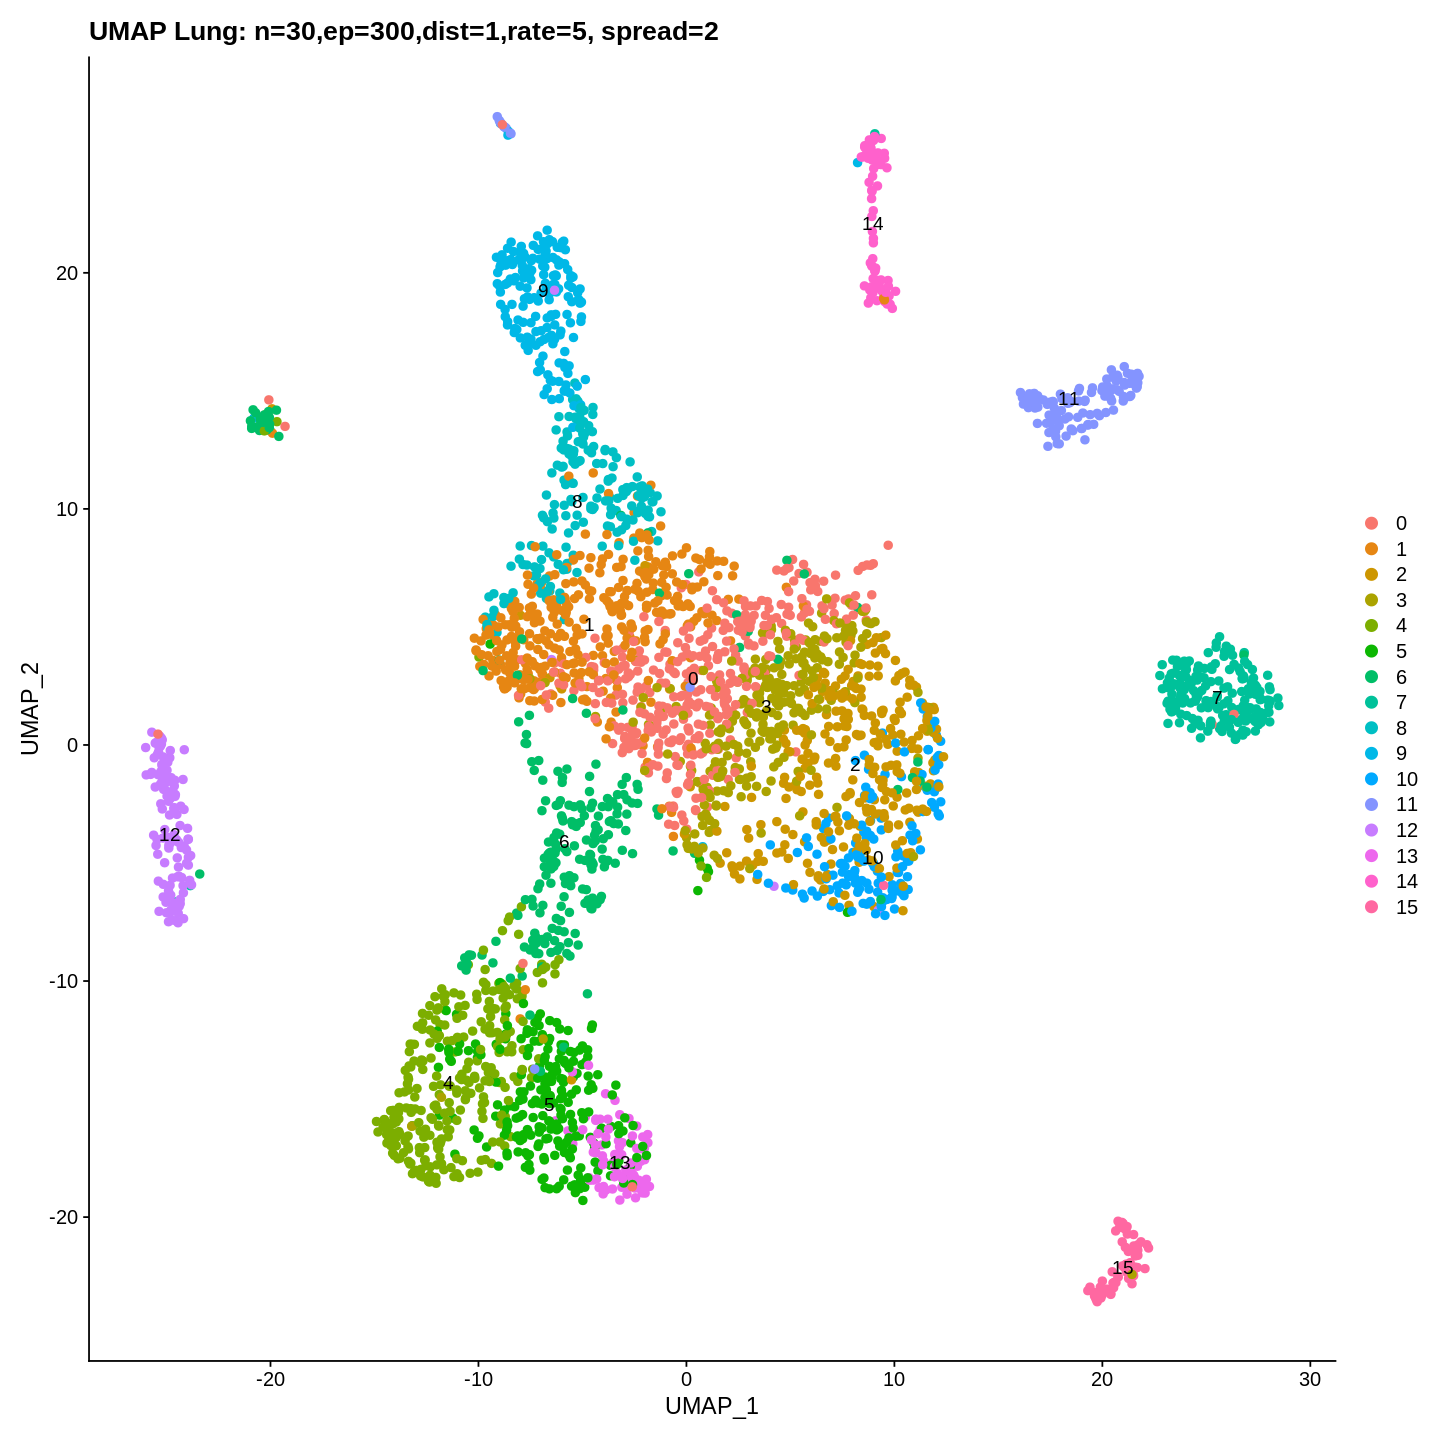

In [26]:
p <- DimPlot(seurat_object, reduction = "umap", label = TRUE, pt.size = 2)
p + labs(title = "UMAP Lung: n=30,ep=300,dist=1,rate=5, spread=2", fig(12,12))

In [27]:
#annotate UMAP clusters
celltype <- cluster_annotation$`Cell Type`
new.cluster.ids <- celltype
names(new.cluster.ids) <- levels(seurat_object)
seurat_object <- RenameIdents(seurat_object, new.cluster.ids)
seurat_object$Celltype <- seurat_object@active.ident

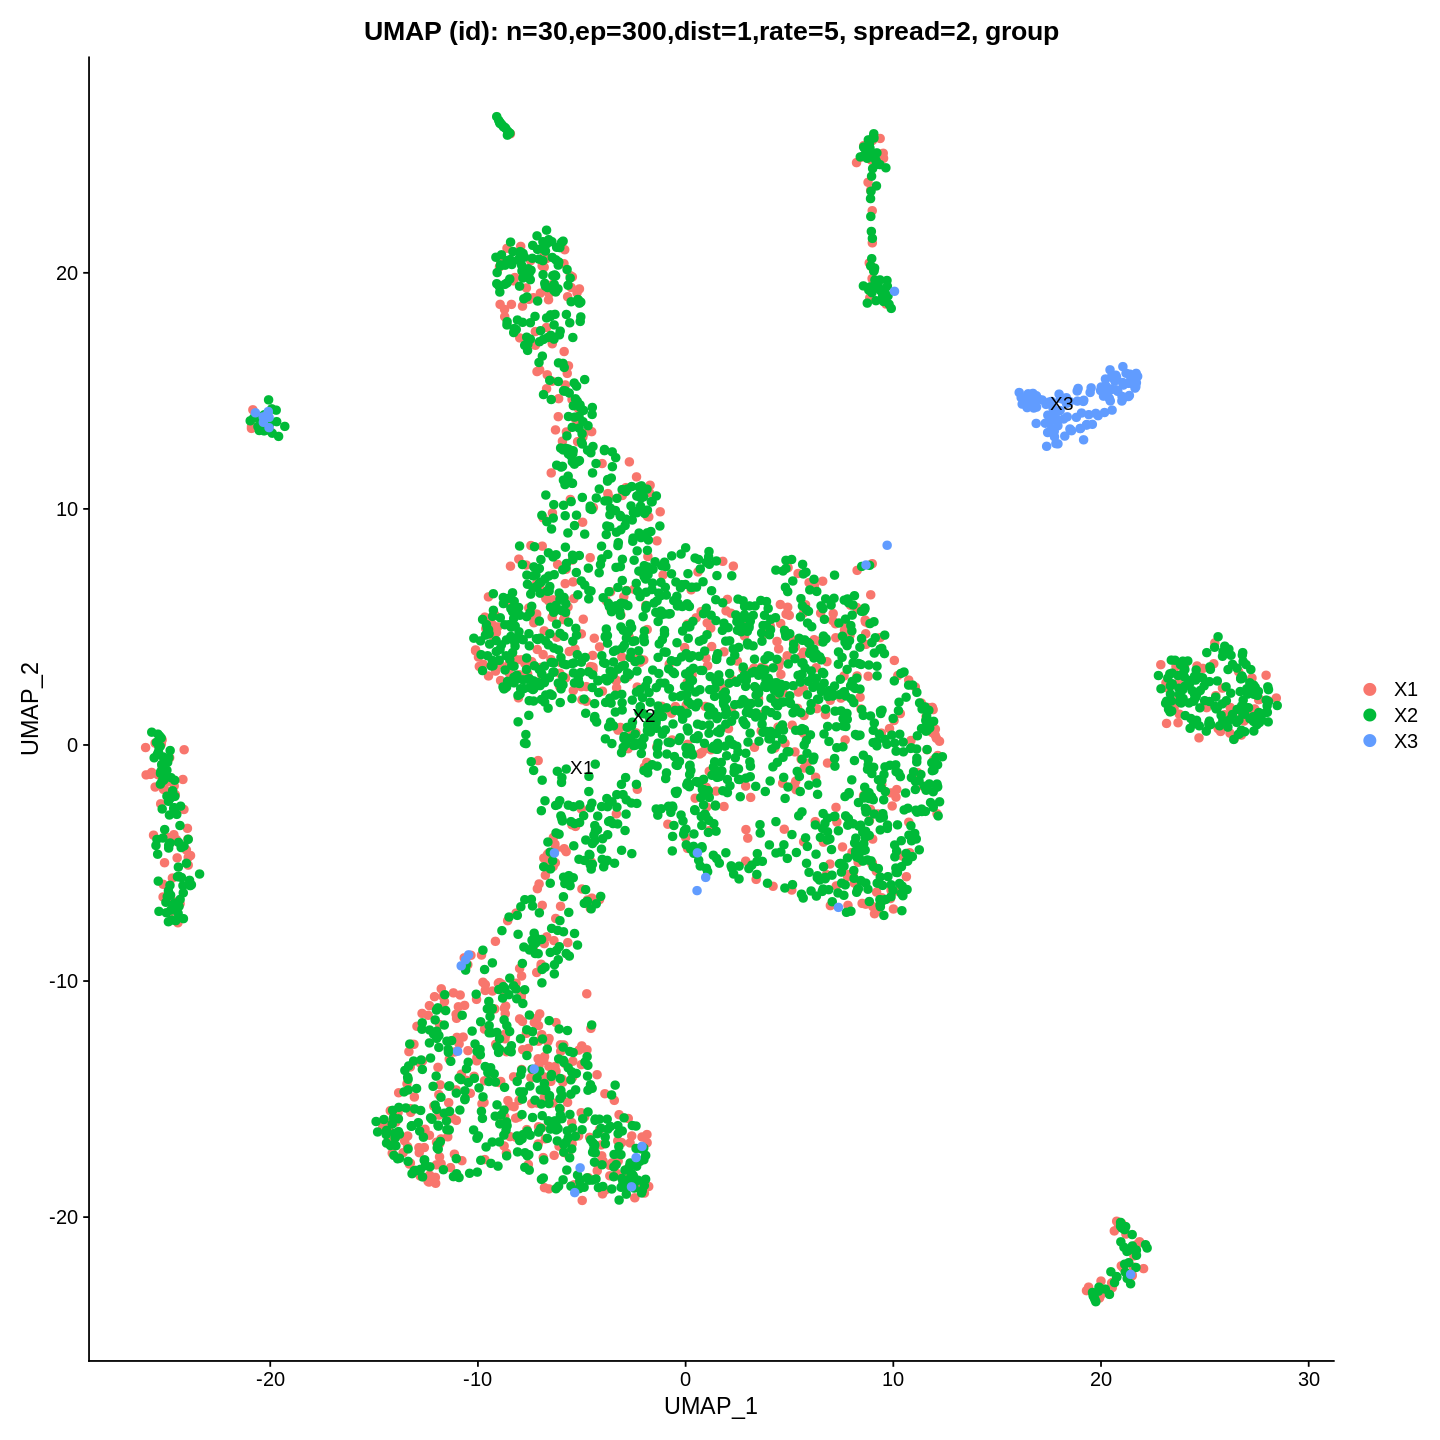

In [28]:
#plot UMAP by sample source (orig.identity)
p <- DimPlot(seurat_object, reduction = "umap", label = TRUE, pt.size = 2, group.by = "orig.ident")
p + labs(title = "UMAP (id): n=30,ep=300,dist=1,rate=5, spread=2, group", fig(12,12))

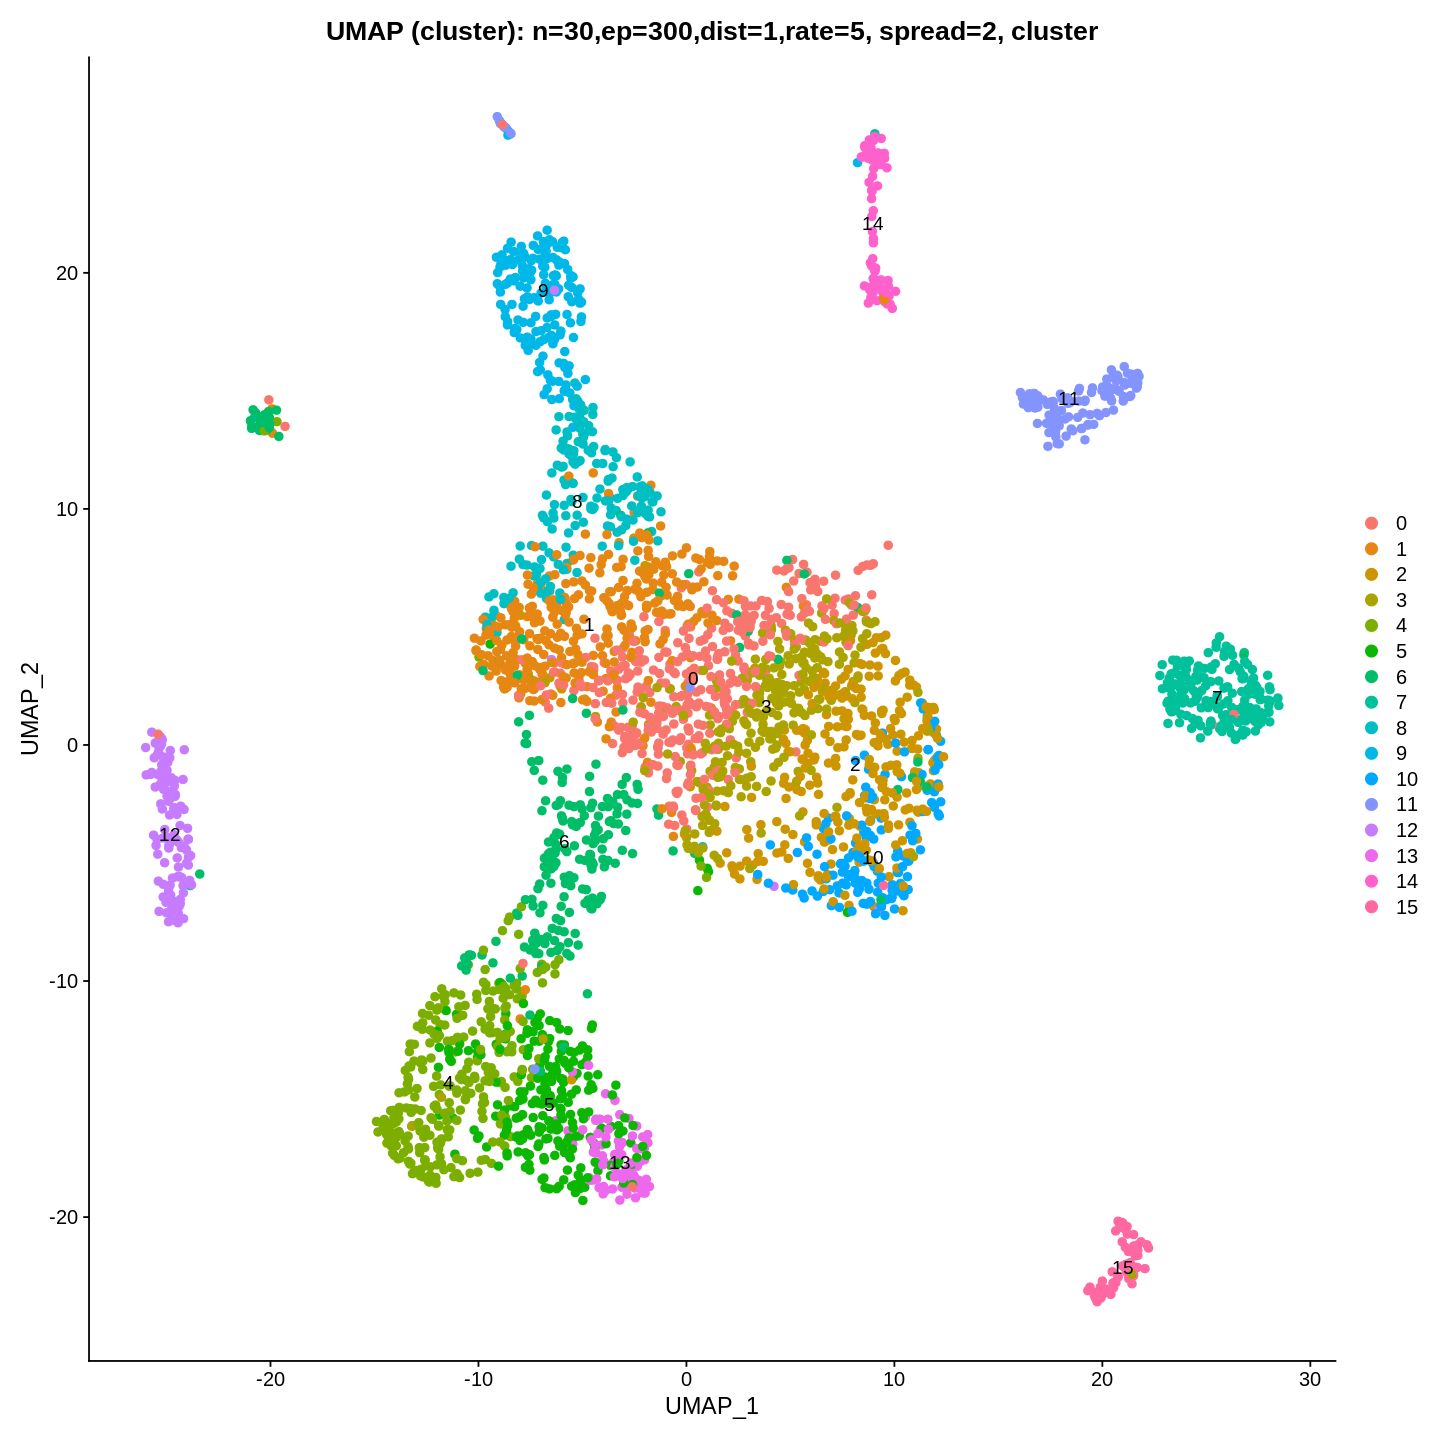

In [29]:
#plot UMAP by cluster id
p <- DimPlot(seurat_object, reduction = "umap", label = TRUE, pt.size = 2, group.by = "seurat_clusters")
p + labs(title = "UMAP (cluster): n=30,ep=300,dist=1,rate=5, spread=2, cluster", fig(12,12))

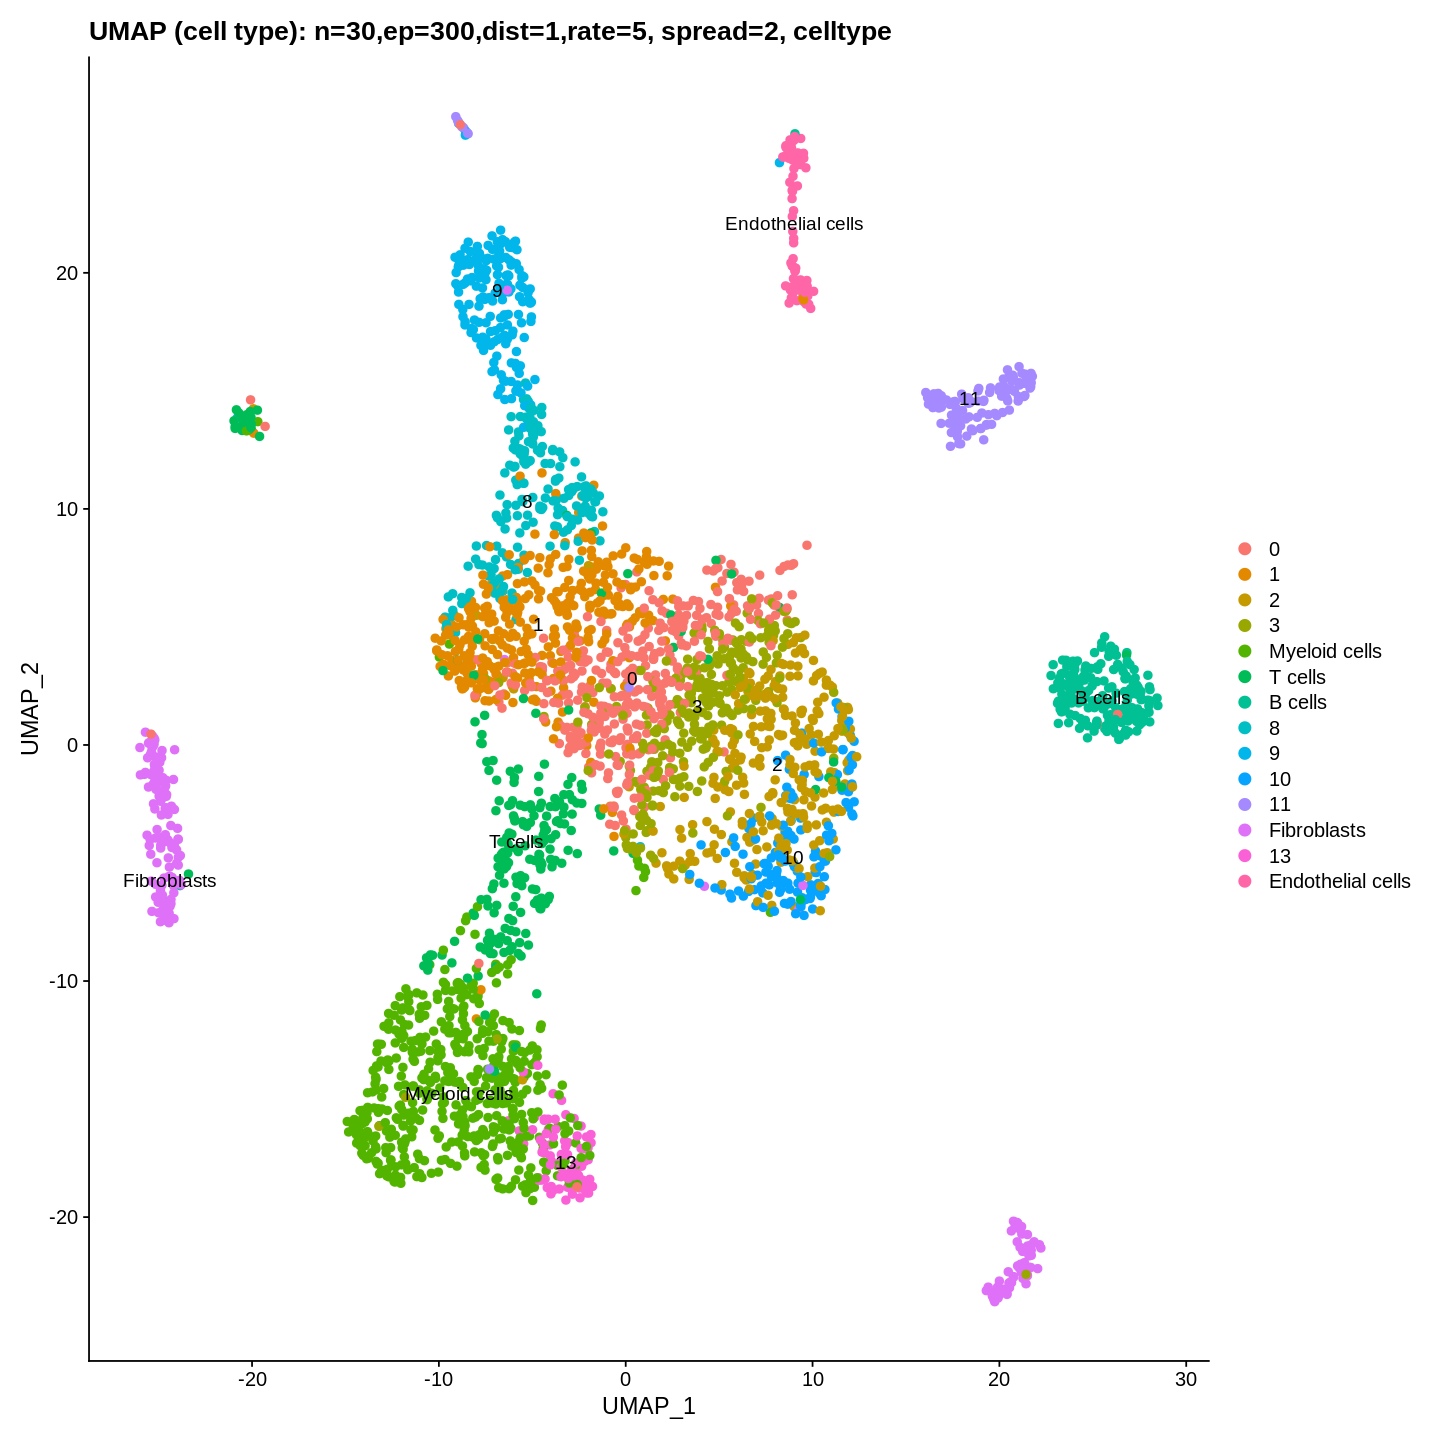

In [30]:
#plot UMAP by Cell Type
p <- DimPlot(seurat_object, reduction = "umap", label = TRUE, pt.size = 2)
p + labs(title = "UMAP (cell type): n=30,ep=300,dist=1,rate=5, spread=2, celltype", fig(12,12))

In [34]:
#set features (genes of interest)
features <- c("AKR1C1", "PERP", "BIRC5", "AKR1C1", "MS4A6A", "CTSL", "TRBC2", "JCHAIN",
              "SERPINB13", "SCEL", "PLK1", "SCGB3A1", "DCN", "LPL", "VWF", "RGS5")

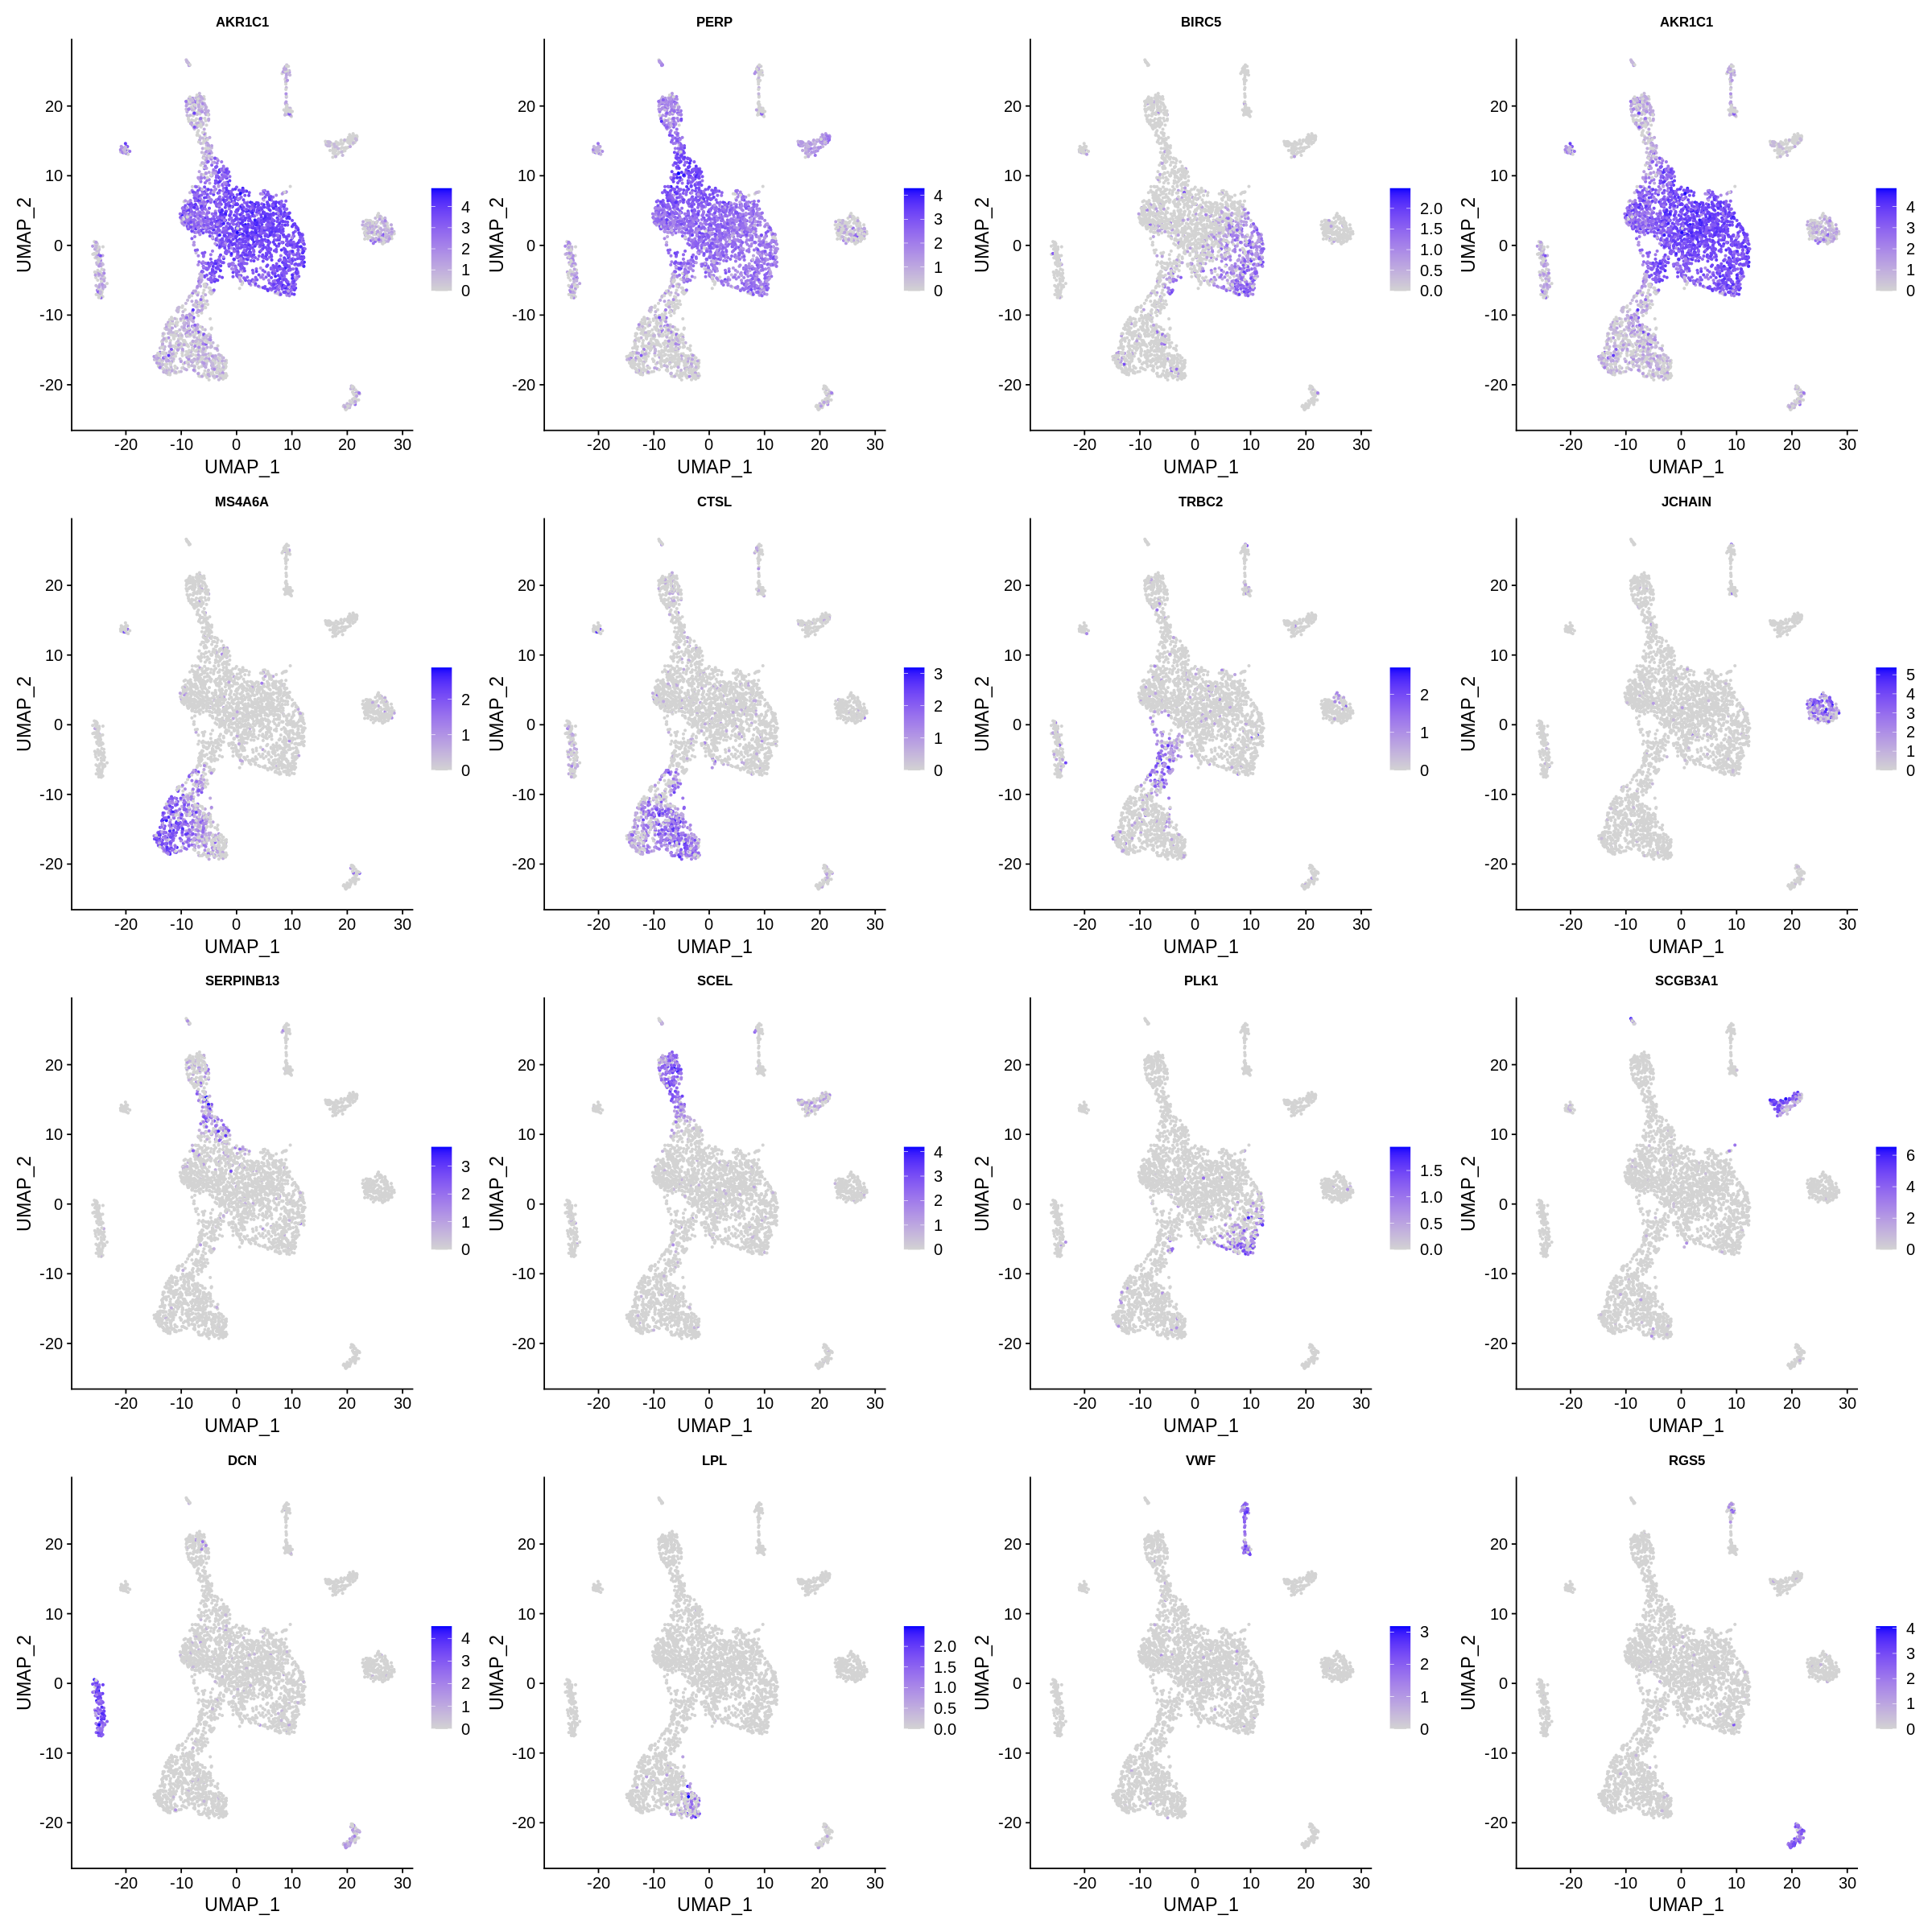

In [35]:
#######################
#feature plots
p <- FeaturePlot(seurat_object, features = features)
p + labs(fig(20,20)) & theme(plot.title = element_text(size=10))

Picking joint bandwidth of 0.211

Picking joint bandwidth of 0.144

Picking joint bandwidth of 0.038

Picking joint bandwidth of 0.211

Picking joint bandwidth of 0.0145

Picking joint bandwidth of 0.0332

Picking joint bandwidth of 0.0155

Picking joint bandwidth of 0.0329

Picking joint bandwidth of 0.0338

Picking joint bandwidth of 0.0471

Picking joint bandwidth of 0.0133

Picking joint bandwidth of 0.0475

Picking joint bandwidth of 0.029

Picking joint bandwidth of 0.0197

Picking joint bandwidth of 0.0165

Picking joint bandwidth of 0.0265



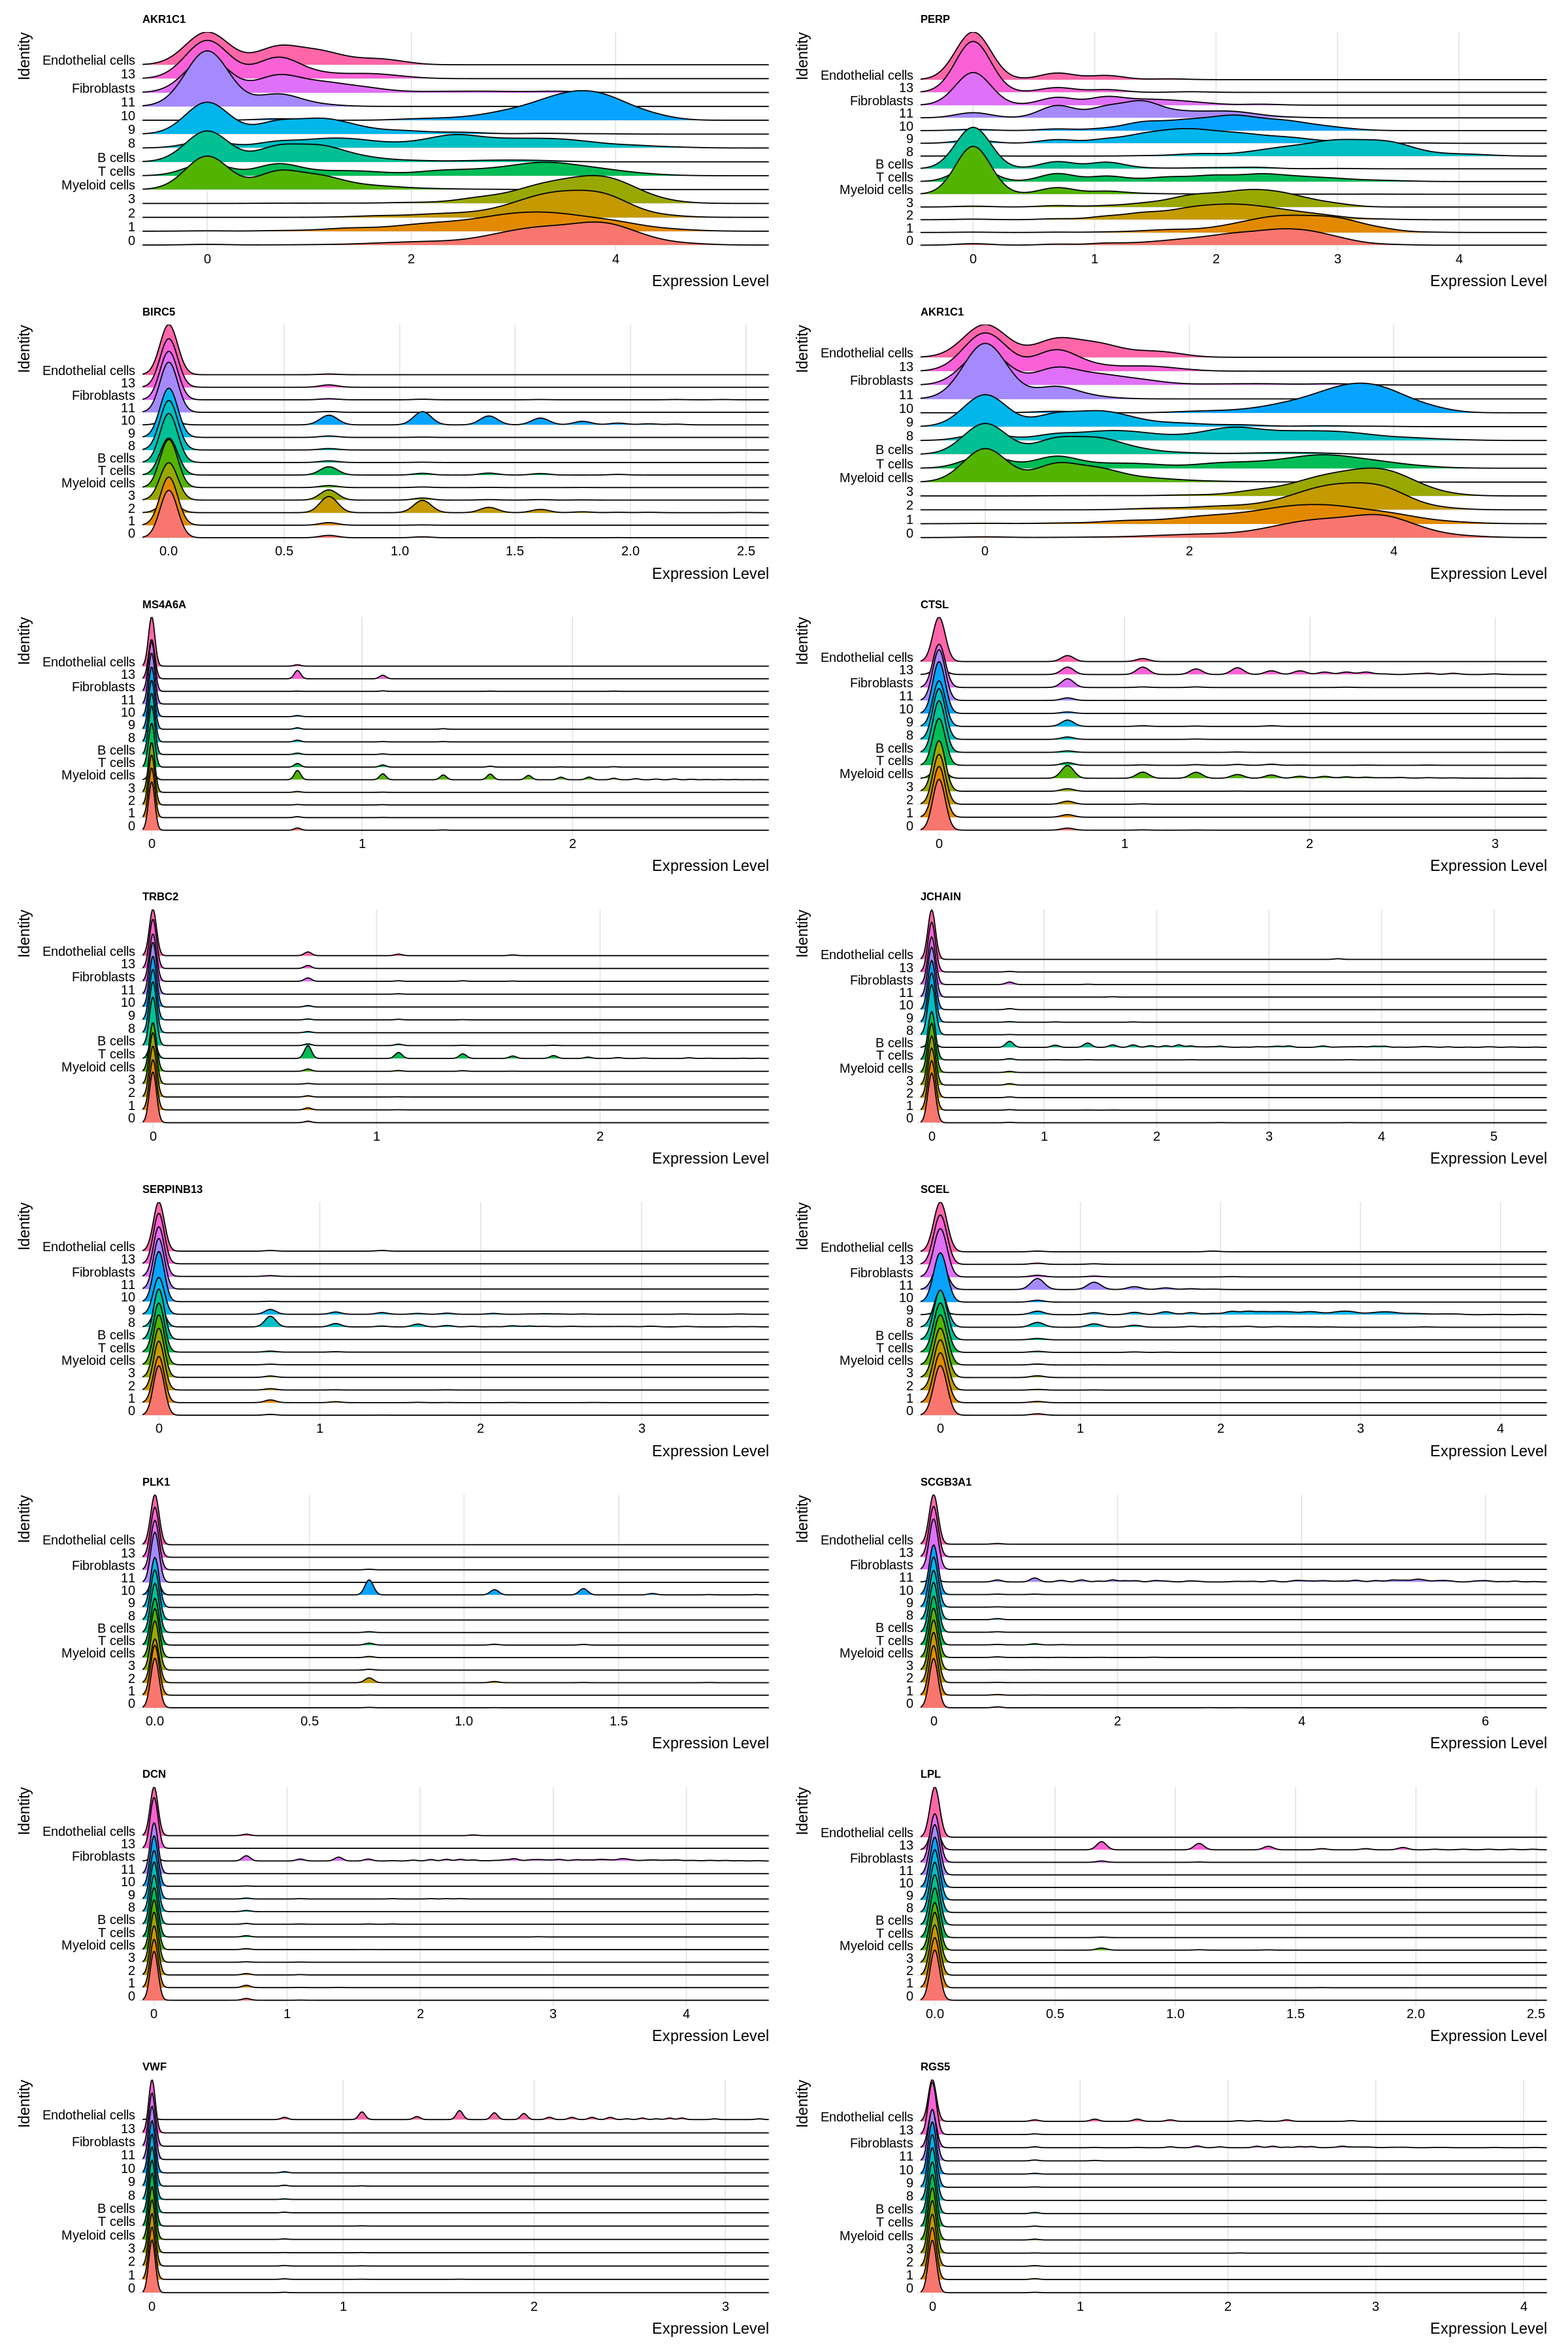

In [37]:
#ridge plot
p <- RidgePlot(seurat_object, features=features, ncol=2)
p + labs(fig(20,30)) & theme(plot.title = element_text(size=10))

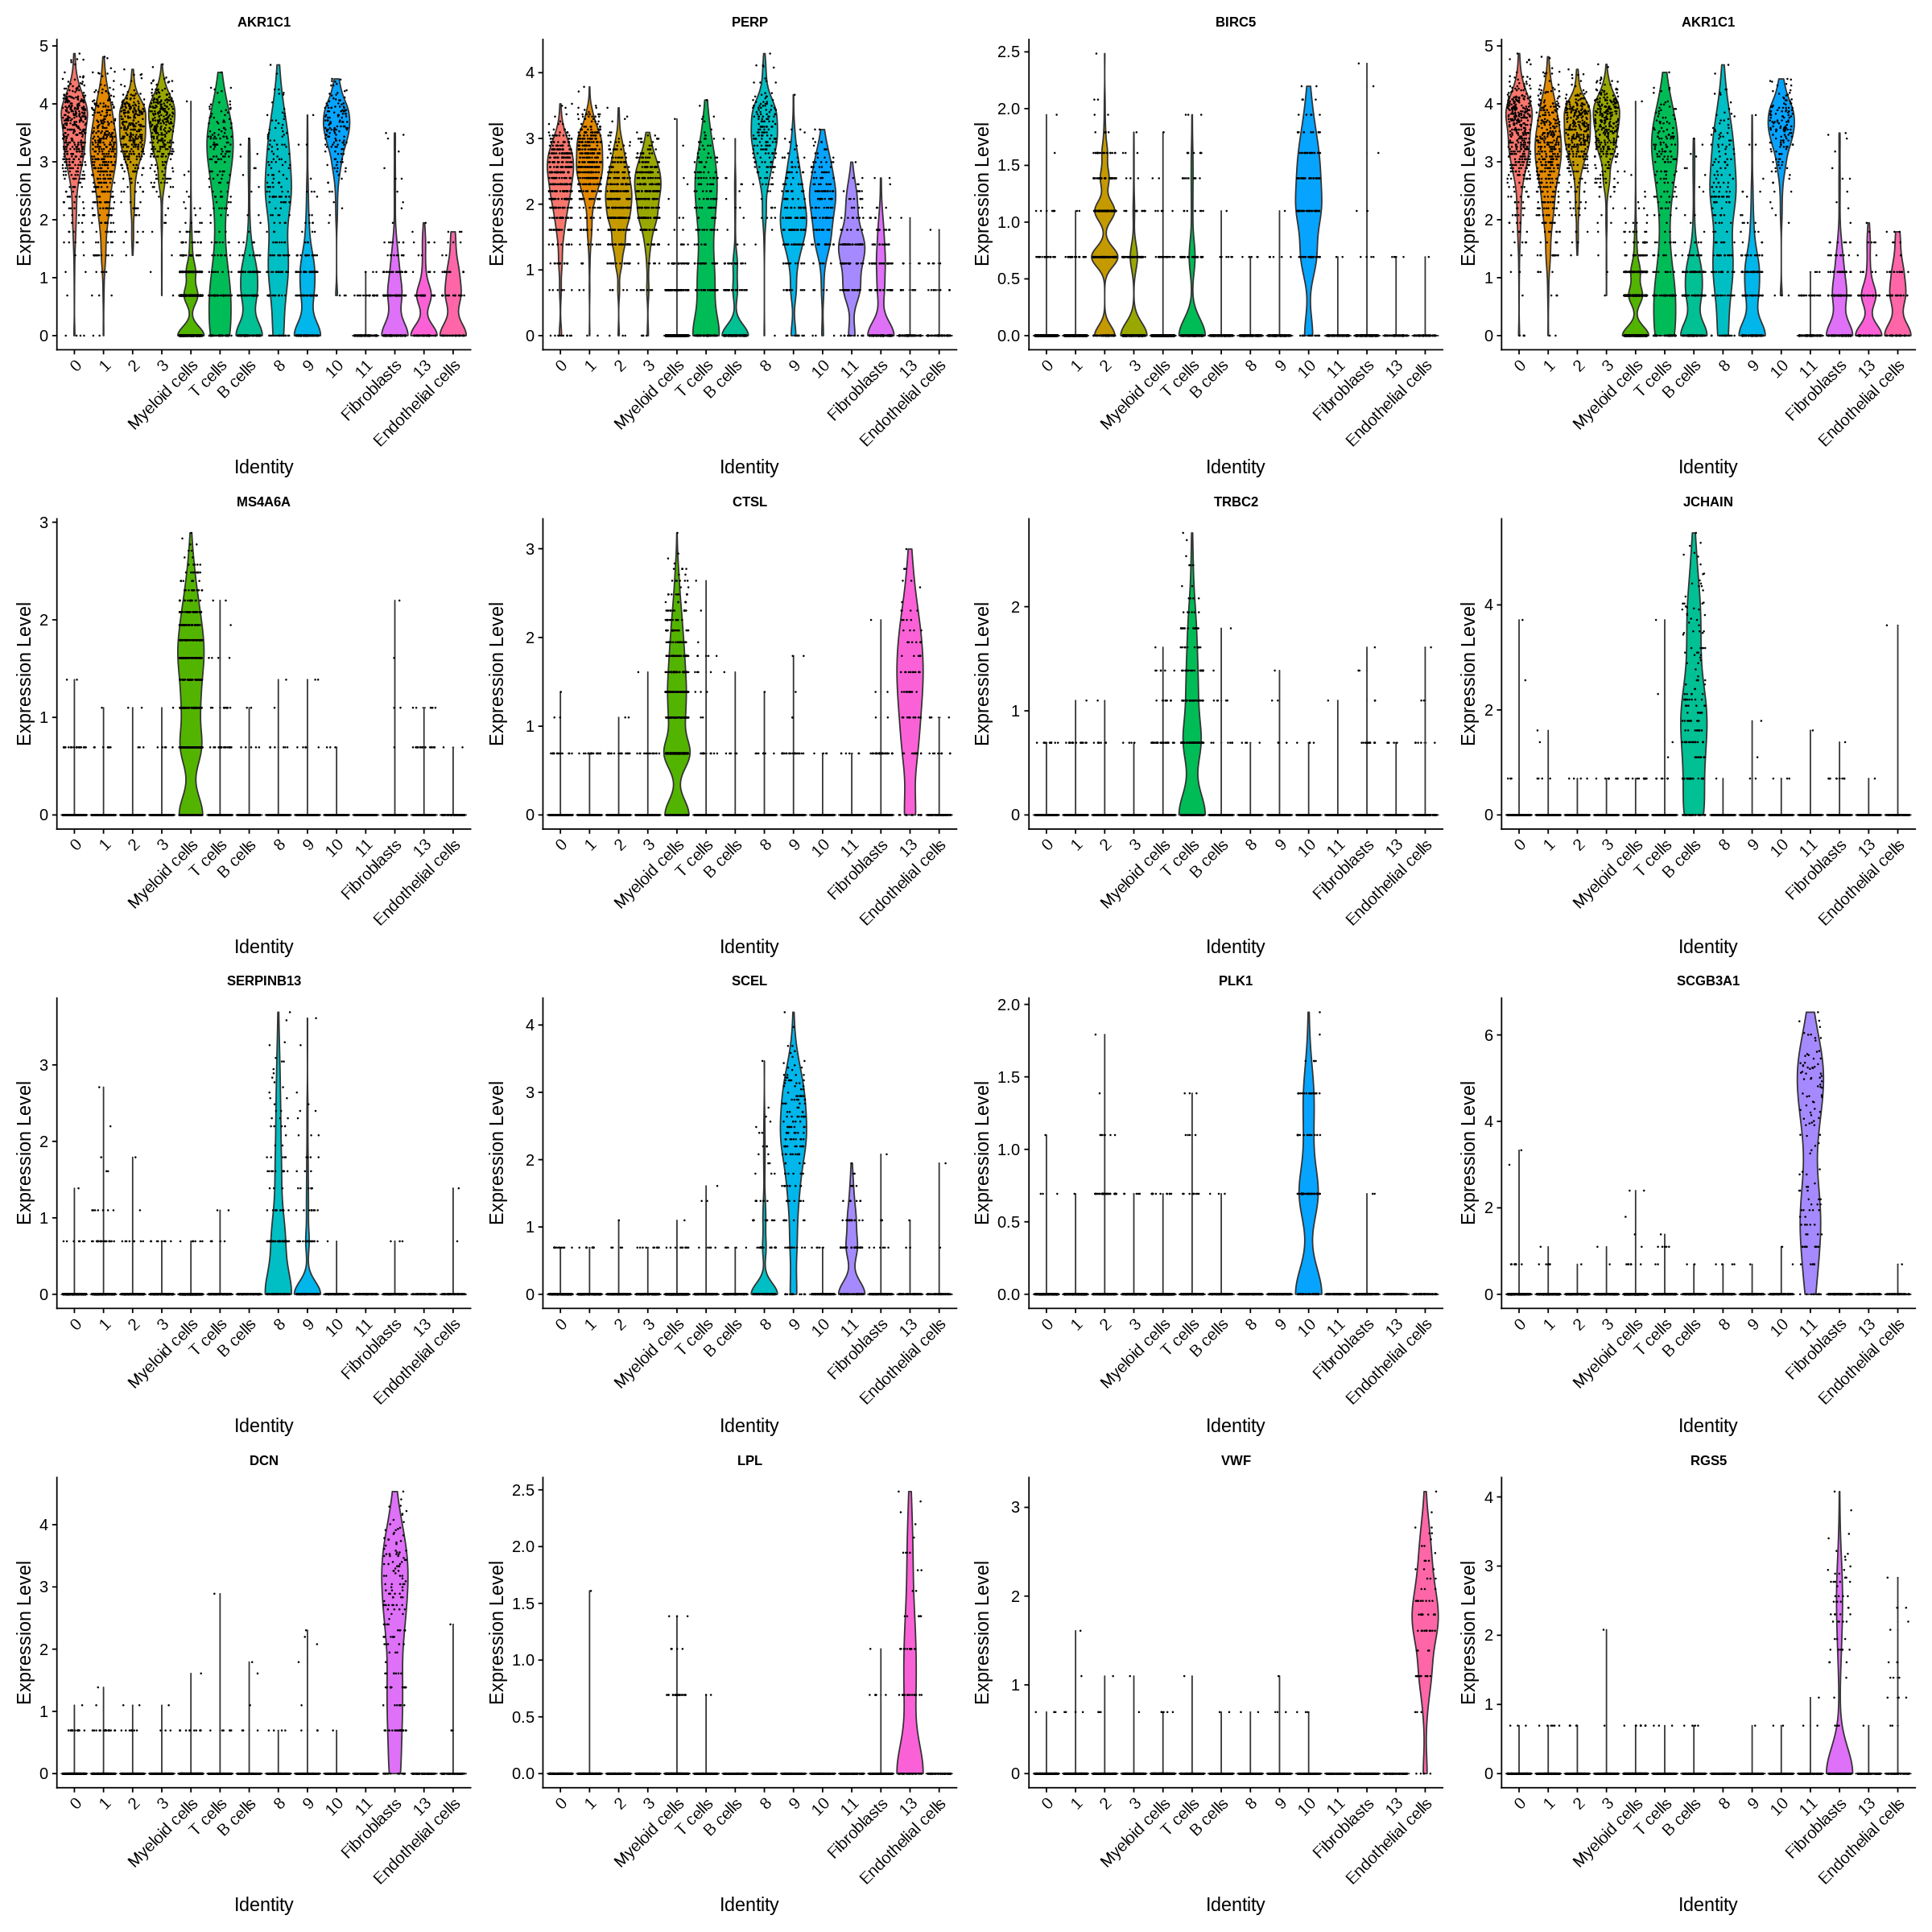

In [38]:
#violin plot
p <- VlnPlot(seurat_object,features=features)
p + labs(fig(20,20)) & theme(plot.title = element_text(size=10))

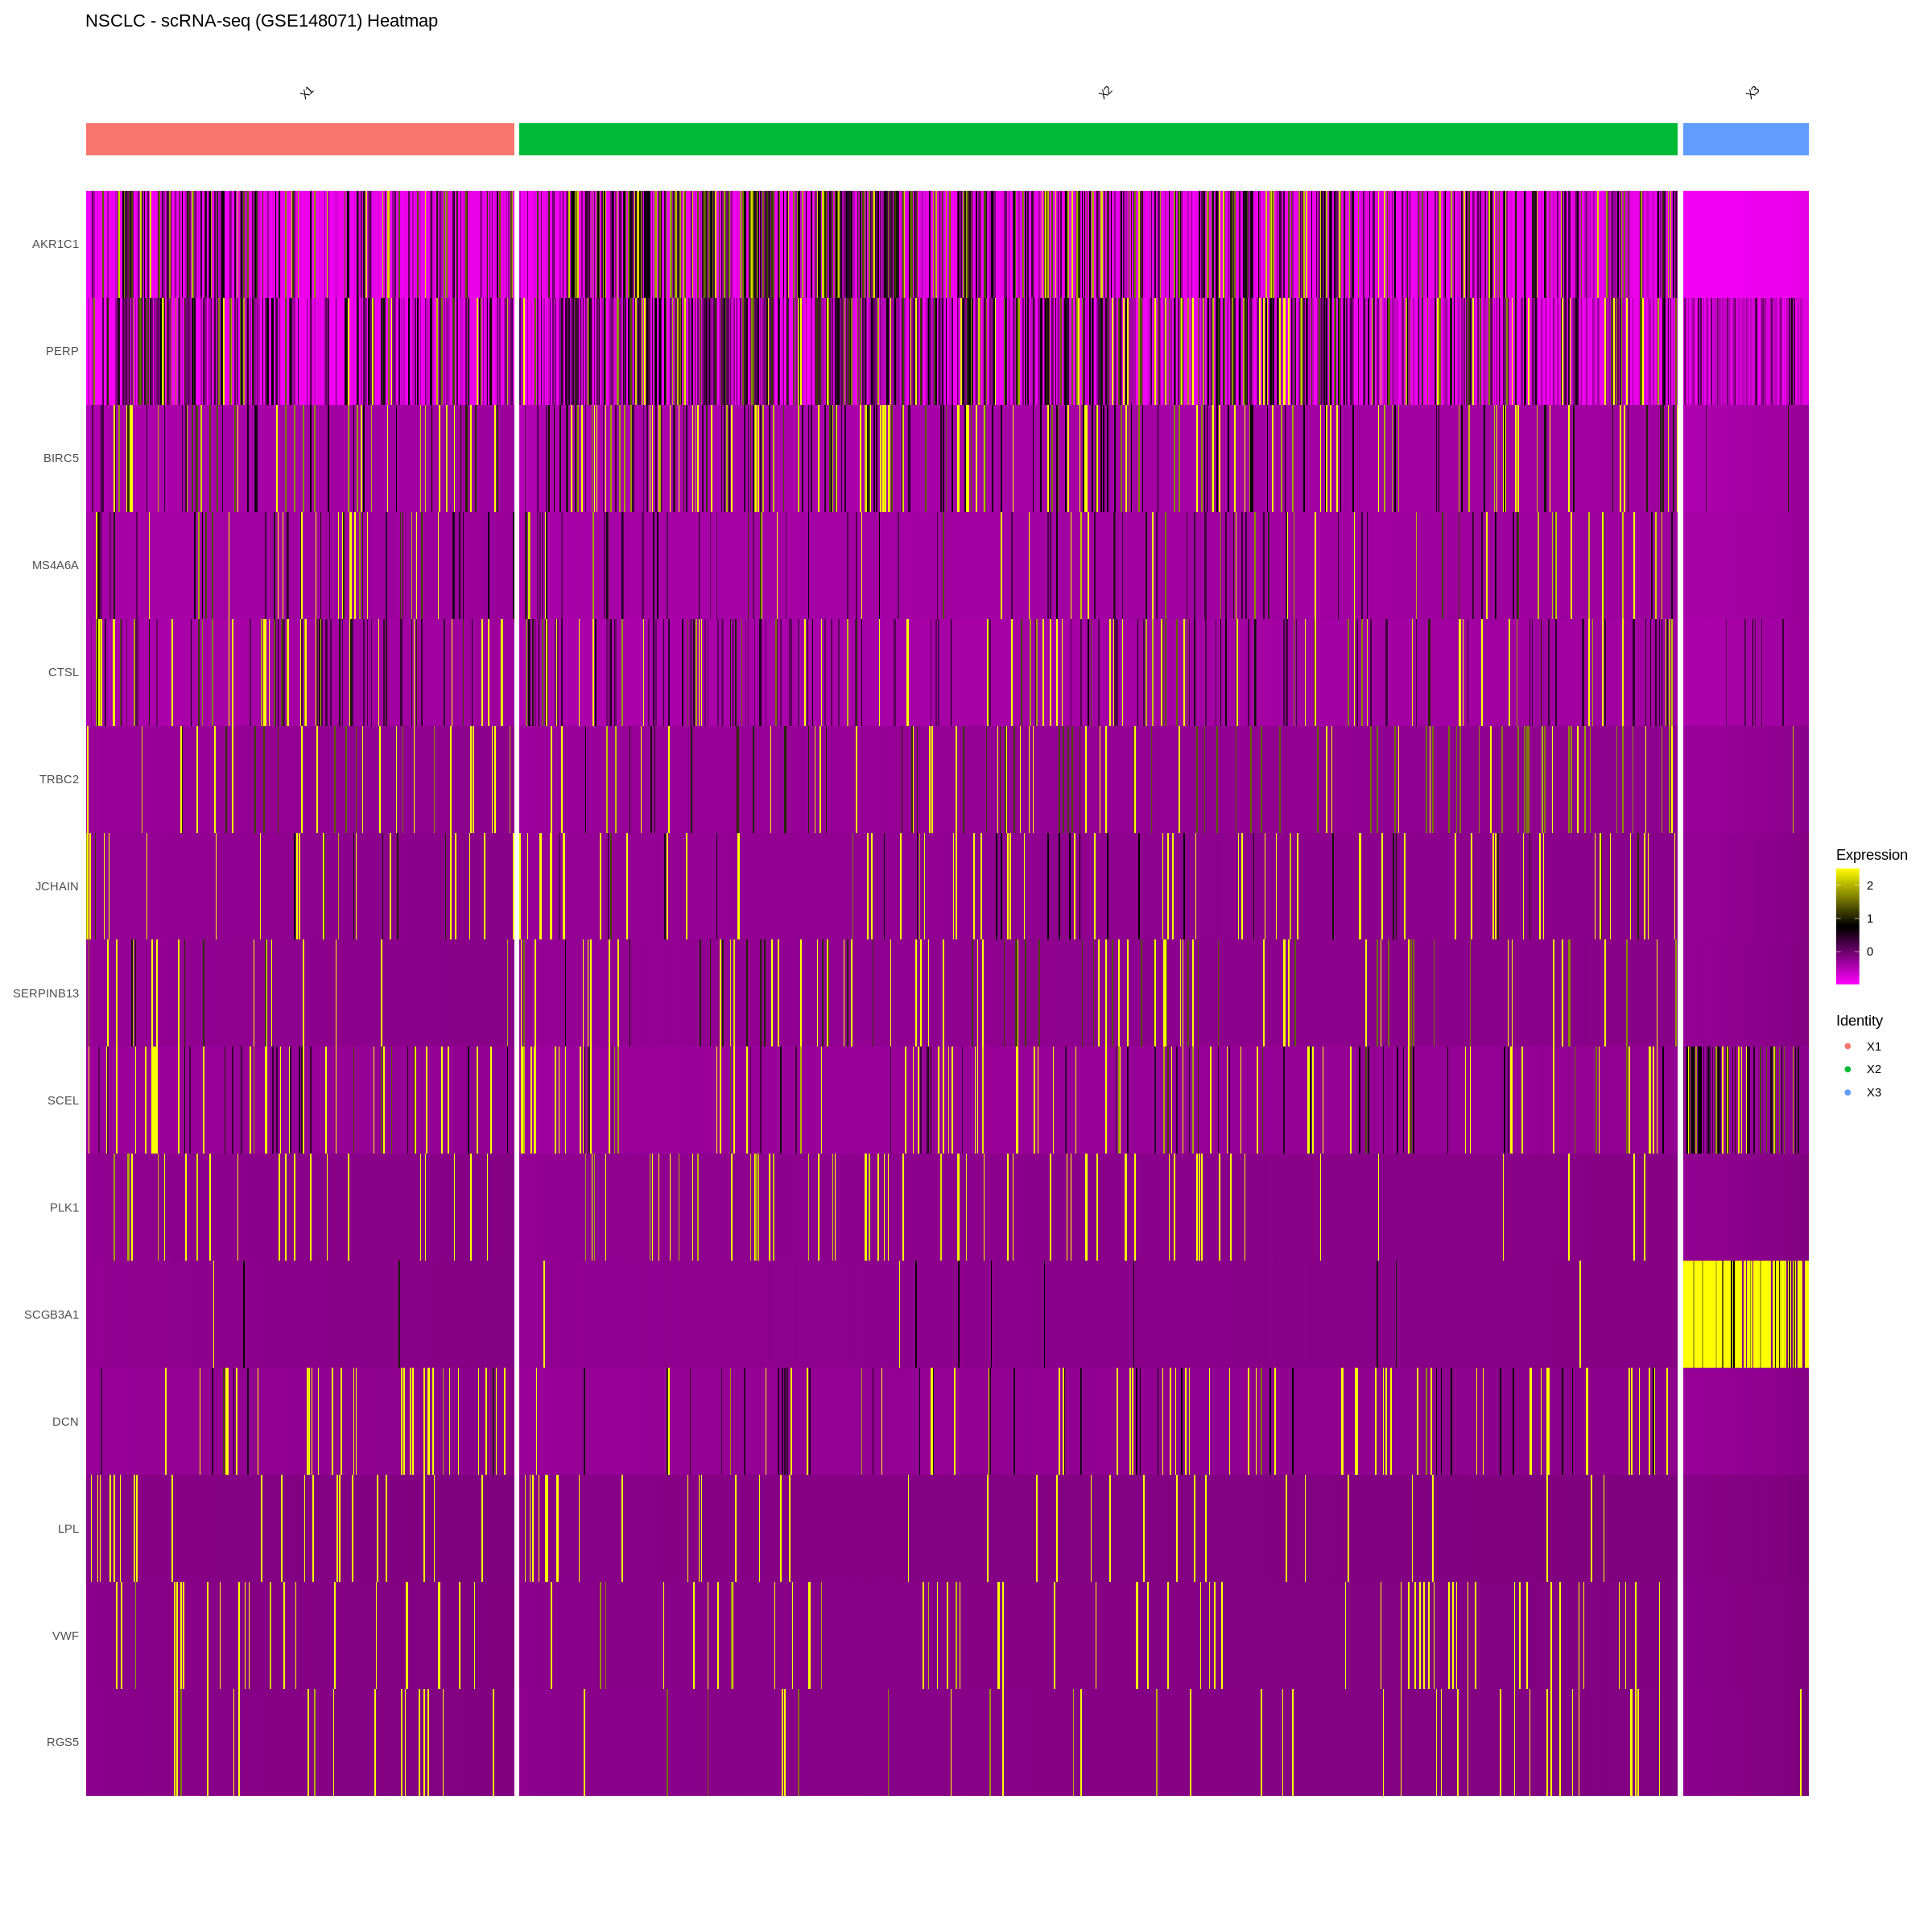

In [42]:
#heatmaps

library(gplots)

#heatmap for cluster by group
plot_name = paste(sample_name, " Heatmap", sep="")
p <- DoHeatmap(subset(seurat_object, downsample = 100), features = features, size = 3, group.by = "orig.ident")
p + labs(title = plot_name)

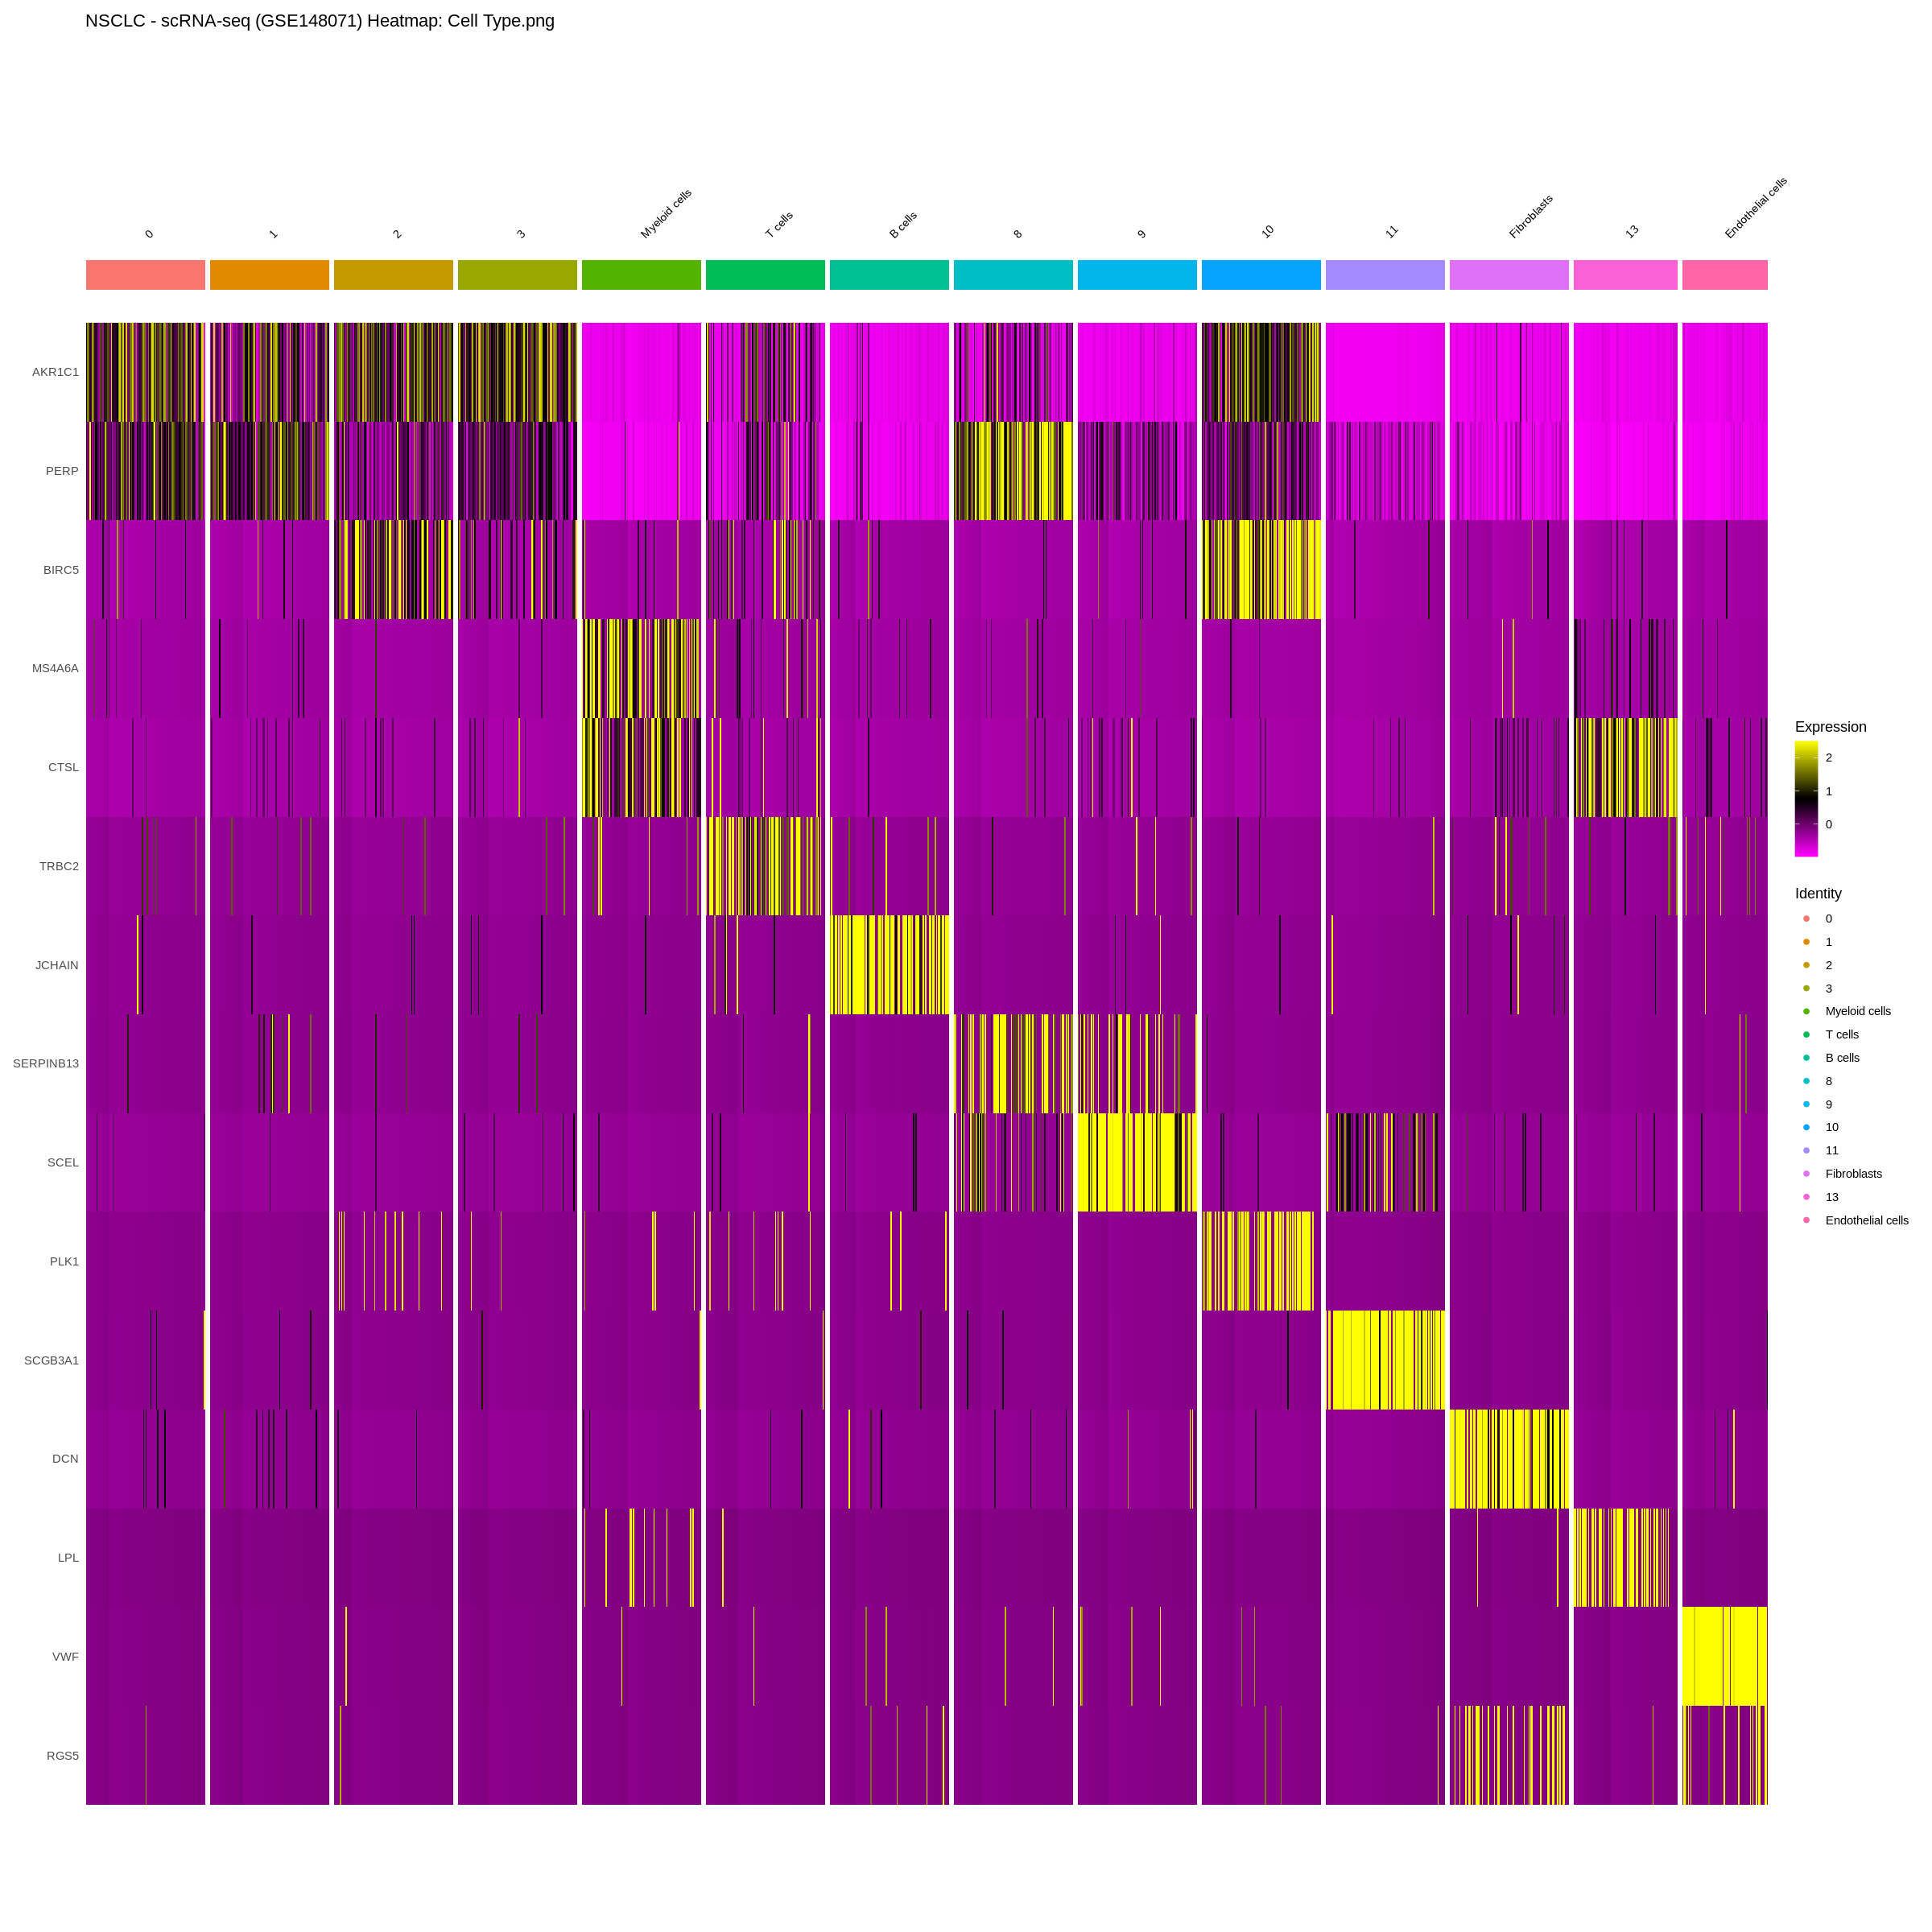

In [43]:
#heatmap for cluster by cell type (with legend)
plot_name = paste(sample_name, " Heatmap: Cell Type.png", sep="")
p <- DoHeatmap(subset(seurat_object, downsample = 100), features = features, size = 3, group.by='Celltype')
p + labs(title = plot_name)

In [46]:
devtools::install_github("xmc811/Scillus", ref = "development")

S4Vectors    (NA -> 0.34.0) [CRAN]
BiocGenerics (NA -> 0.42.0) [CRAN]
GlobalOpt... (NA -> 0.1.2 ) [CRAN]
rjson        (NA -> 0.2.21) [CRAN]
shape        (NA -> 1.4.6 ) [CRAN]
doParallel   (NA -> 1.0.17) [CRAN]
IRanges      (NA -> 2.30.0) [CRAN]
clue         (NA -> 0.3-61) [CRAN]
GetoptLong   (NA -> 1.0.5 ) [CRAN]
circlize     (NA -> 0.4.15) [CRAN]
formattable  (NA -> 0.2.1 ) [CRAN]
ComplexHe... (NA -> 2.12.0) [CRAN]


Installing 12 packages: S4Vectors, BiocGenerics, GlobalOptions, rjson, shape, doParallel, IRanges, clue, GetoptLong, circlize, formattable, ComplexHeatmap

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpiOYCdn/remotes3d22f9e87d/xmc811-Scillus-4e7884d/DESCRIPTION’ ... OK
* preparing ‘Scillus’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘Scillus/test’
* building ‘Scillus_0.5.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in set_colors(anno_colors[[i]], length(l)):
“Number of colors required exceeds palette capacity. RdYlBu spectrum will be used instead.”
`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



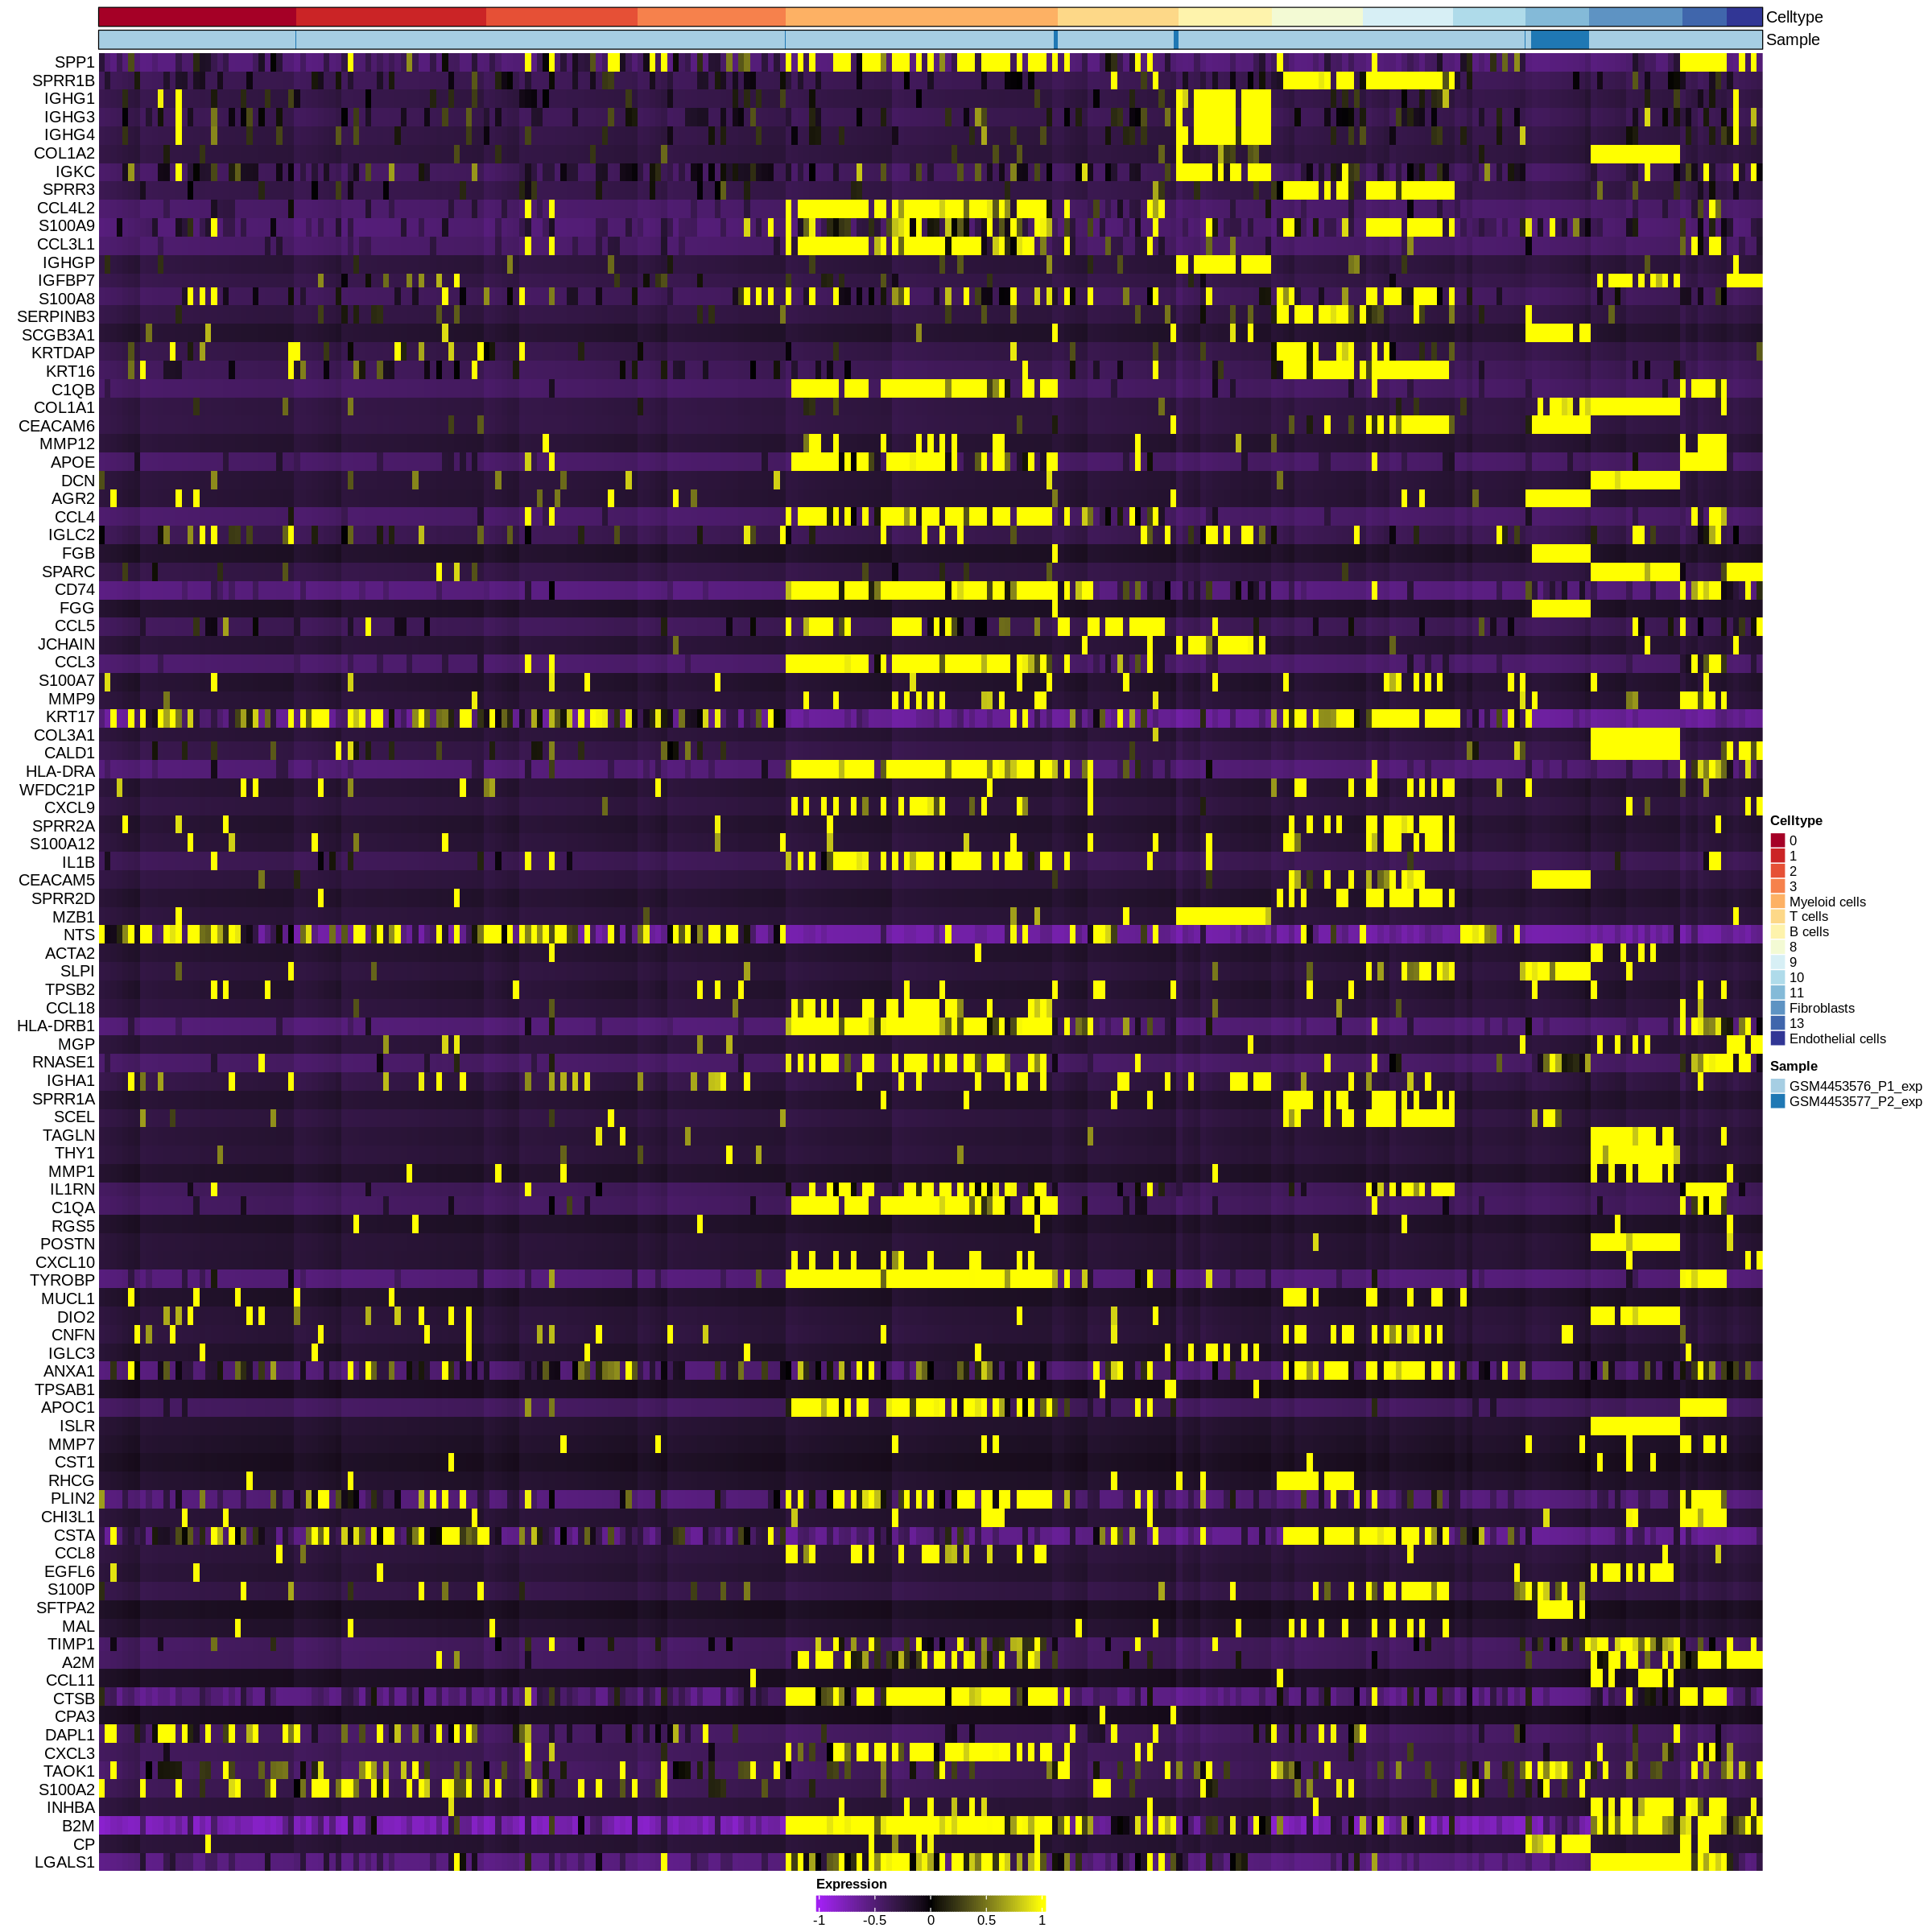

In [53]:
#Complex heatmap for cluster by cell type and cluster
library(Scillus)

plot_heatmap(dataset = seurat_object,
             n = 2,
             markers = VariableFeatures(seurat_object)[1:100],
             sort_var = c("Celltype","Group"),
             anno_var = c("Celltype", "Sample"),
             anno_colors = list("Set2","Paired"),
             hm_limit = c(-1,0, 1),
             hm_colors = c("purple","black","yellow"))